In [1]:
import pandas as pandas
import numpy as np

# Loading data

In [2]:
# load 'test.xlsx'

df_test = pandas.read_excel('test.xlsx', sheet_name='data', header=None)

df_test

,0,1,2
0,Community,Community Name,Braybrook (Suburb)
1,Community,Region,Northern and Western Metropolitan
2,Geography,Map reference,4
3,Geography,Grid reference,A3
4,Geography,Location,10km WNW of Melbourne
...,...,...,...
221,Hospital,Distance to nearest public hospital with emerg...,10.161988
222,Hospital,Presentations to emergency departments due to ...,543.631989
223,Hospital,Presentations to emergency departments due to ...,20.647263
224,Hospital,Category 4 & 5 emergency department presentations,1683.966712


In [3]:
# set the first column as reference
ref_col = df_test.iloc[:, 0]

In [4]:
def excel_loader(xlsx_path, sheet_name='data', ref_col=ref_col):
	# load the excel file
	df = pandas.read_excel(xlsx_path, sheet_name=sheet_name, header=None)
	# replace the first column with the reference column
	df.iloc[:, 0] = ref_col
	# change the column names
	df.columns = ['feature_kind', 'feature_name', 'feature_value']
	return df



In [5]:
excel_loader('data/Ascot-Vale-Suburb - XLSX.xlsx')

,feature_kind,feature_name,feature_value
0,Community,Community Name,Ascot Vale (Suburb)
1,Community,Region,Northern and Western Metropolitan
2,Geography,Map reference,4
3,Geography,Grid reference,B3
4,Geography,Location,6km NW of Melbourne
...,...,...,...
221,Hospital,Distance to nearest public hospital with emerg...,4.993841
222,Hospital,Presentations to emergency departments due to ...,679.257076
223,Hospital,Presentations to emergency departments due to ...,20.502456
224,Hospital,Category 4 & 5 emergency department presentations,1864.918123


In [6]:
import os

dataset_list=['data/'+f for f in os.listdir('data') if f.endswith('.xlsx')]
df_all=[excel_loader(f) for f in dataset_list]
df_all

[    feature_kind                                       feature_name  \
 0      Community                                     Community Name   
 1      Community                                             Region   
 2      Geography                                      Map reference   
 3      Geography                                     Grid reference   
 4      Geography                                           Location   
 ..           ...                                                ...   
 221     Hospital  Distance to nearest public hospital with emerg...   
 222     Hospital  Presentations to emergency departments due to ...   
 223     Hospital  Presentations to emergency departments due to ...   
 224     Hospital  Category 4 & 5 emergency department presentations   
 225     Hospital  Category 4 & 5 emergency department presentati...   
 
                          feature_value  
 0                  Ascot Vale (Suburb)  
 1    Northern and Western Metropolitan  
 2      

In [7]:
# count the columns for each dataset
df_all_count = [df.shape[0] for df in df_all]
# check if all the datasets have the same number of columns
all(x == df_all_count[0] for x in df_all_count)

True

# Check for missing vals

In [8]:
# check for missing values in any of the datasets
missing_values = [df.isnull().values.any() for df in df_all]
# print the index of the dataset with missing values
dfs_with_na=[i for i, x in enumerate(missing_values) if x]
dfs_with_na

[8, 9, 22, 26, 29, 30, 31, 32]

In [9]:
for i in dfs_with_na:
	print(dataset_list[i])

data/Malvern-Suburb - XLSX.xlsx
data/Melbourne-Airport-Suburb - XLSX.xlsx
data/Sorrento-Suburb - XLSX.xlsx
data/St-Andrews-Beach-Suburb - XLSX.xlsx
data/St-Kilda-West-Suburb - XLSX.xlsx
data/Toorak-Suburb - XLSX.xlsx
data/Tyabb-Suburb - XLSX.xlsx
data/Waterways-Suburb - XLSX.xlsx


In [10]:
# write utility function to get the index and the feature_category, feature_name, feature_value of the missing values for a given dataset

def get_missing_values(df):
	# get the index of the missing values
	missing_values_index = df[df.isnull().any(axis=1)].index
	# get the feature_category, feature_name, feature_value of the missing values
	missing_values = df.iloc[missing_values_index]
	return missing_values

In [11]:
affected_details = [get_missing_values(df_all[i]) for i in dfs_with_na]

In [12]:
affected_rows_count=[df.shape[0] for df in affected_details]
affected_rows_count

[1, 52, 5, 8, 1, 1, 1, 5]

**NOTE:** Airport suburb has too much missing vals. 

In [13]:
for i in range(len(dfs_with_na)):
	# print(dataset_list[dfs_with_na[i]])
	if i!=1: print(affected_details[i])

    feature_kind                             feature_name feature_value
171    Diversity  Aboriginal or Torres Strait Islander, %           NaN
          feature_kind                             feature_name feature_value
120  Socio-demographic     % dwellings which are public housing           NaN
133  Socio-demographic      Male-headed lone parent families, %           NaN
171          Diversity  Aboriginal or Torres Strait Islander, %           NaN
179          Diversity              Poor English proficiency, %           NaN
209          Diversity               5th top language spoken, %           NaN
          feature_kind                             feature_name feature_value
120  Socio-demographic     % dwellings which are public housing           NaN
122  Socio-demographic       Dwellings with no motor vehicle, %           NaN
153  Socio-demographic              Aged 75+ and lives alone, %           NaN
171          Diversity  Aboriginal or Torres Strait Islander, %           Na

In [14]:
# figure out which feature category is missing across the affected datasets
missing_feature_categories = [df['feature_kind'].unique() for df in affected_details]
missing_feature_names = [df['feature_name'].unique() for df in affected_details]

missing_feature_names[:1]+missing_feature_categories[2:]

[array(['Aboriginal or Torres Strait Islander, %'], dtype=object),
 array(['Socio-demographic', 'Diversity'], dtype=object),
 array(['Socio-demographic', 'Diversity'], dtype=object),
 array(['Diversity'], dtype=object),
 array(['Socio-demographic'], dtype=object),
 array(['Socio-demographic'], dtype=object),
 array(['2007-2012 population change', 'Socio-demographic', 'Diversity'],
       dtype=object)]

# Attempt with geographic locations

In [15]:
from geopy.distance import geodesic
from geopy.point import Point as GeoPoint

# Melbourne GPO coordinates
gpo_coords = GeoPoint(-37.8136, 144.9631)

# Define distance (19 km) and bearing (315 degrees)
bearing = 315
distance = 19  # km

# Calculate the new location using the geodesic distance
new_location = geodesic(kilometers=distance).destination(gpo_coords, bearing)

# Extract the new latitude and longitude
new_latitude, new_longitude = new_location.latitude, new_location.longitude

# Display the new coordinates
new_latitude, new_longitude


(-37.69245620963731, 144.81077199274378)

## Sample point on map

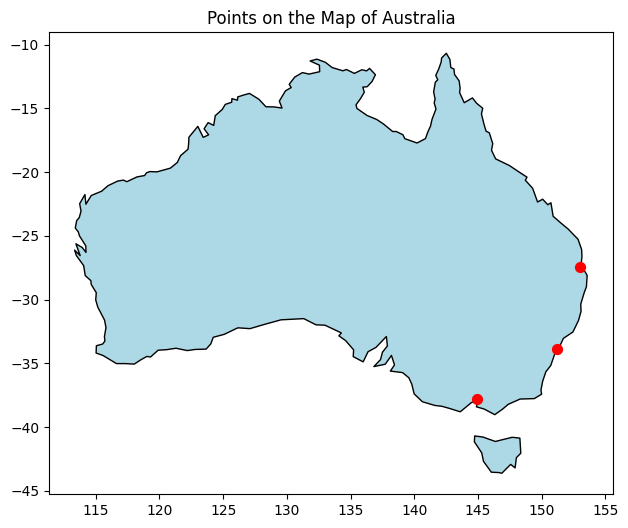

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame with some sample points (latitude, longitude)
data = {'city': ['Sydney', 'Melbourne', 'Brisbane'],
	'latitude': [-33.8688, -37.8136, -27.4698],
	'longitude': [151.2093, 144.9631, 153.0251]}

# Create a geometry column from the latitude and longitude
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]

# Create a GeoDataFrame for the points
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Load the world map from the downloaded shapefile
world = gpd.read_file("earth_data/ne_110m_admin_0_countries.shp")

# Filter for Australia only
australia = world[world['NAME'] == 'Australia']

# Plotting the map of Australia and the points
fig, ax = plt.subplots(figsize=(10, 6))
australia.plot(ax=ax, color='lightblue', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=50)

plt.title('Points on the Map of Australia')
plt.show()


In [17]:
def plot_points_on_map(lat_lon_pairs, map_path="earth_data/ne_110m_admin_0_countries.shp"):
	# Create a GeoDataFrame with the latitude and longitude pairs
	data = {'latitude': [pair[0] for pair in lat_lon_pairs],
		'longitude': [pair[1] for pair in lat_lon_pairs]}
	geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
	gdf = gpd.GeoDataFrame(data, geometry=geometry)

	# Load the world map from the downloaded shapefile
	world = gpd.read_file(map_path)

	# Filter for Australia only
	australia = world[world['NAME'] == 'Australia']

	# Plotting the map of Australia and the points
	fig, ax = plt.subplots(figsize=(10, 6))
	australia.plot(ax=ax, color='lightblue', edgecolor='black')
	gdf.plot(ax=ax, color='red', markersize=50)

	plt.title('Points on the Map of Australia')
	plt.show()
	

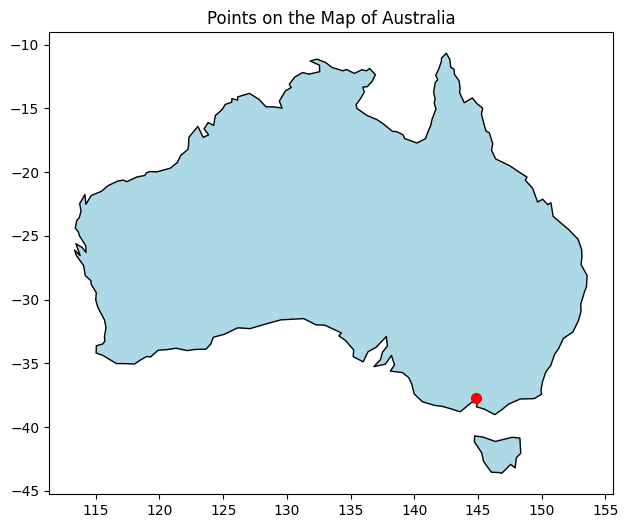

In [18]:
plot_points_on_map([(new_latitude, new_longitude)])

## Zoomed in on Melbourne

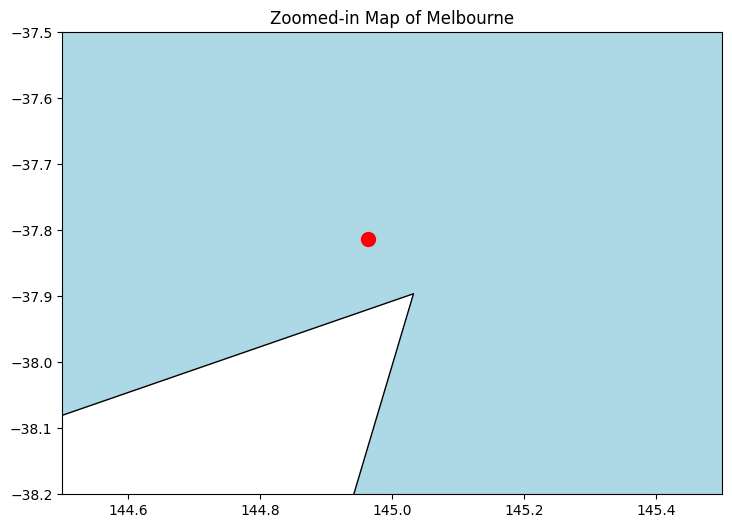

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame with some sample points (latitude, longitude)
data = {'city': ['Melbourne'],
	'latitude': [-37.8136],
	'longitude': [144.9631]}

# Create a geometry column from the latitude and longitude
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]

# Create a GeoDataFrame for the points
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Load the world map from the downloaded shapefile
world = gpd.read_file("earth_data/ne_110m_admin_0_countries.shp")

# Filter for Australia only (you can skip this step if you want to focus just on Melbourne)
australia = world[world['NAME'] == 'Australia']

# Plotting the map of Australia and the points (zoomed to Melbourne)
fig, ax = plt.subplots(figsize=(10, 6))
australia.plot(ax=ax, color='lightblue', edgecolor='black')

# Zoom in on Melbourne by setting axis limits (latitude and longitude boundaries)
ax.set_xlim([144.5, 145.5])  # Longitude range around Melbourne
ax.set_ylim([-38.2, -37.5])  # Latitude range around Melbourne

# Plot the point for Melbourne
gdf.plot(ax=ax, color='red', markersize=100)

plt.title('Zoomed-in Map of Melbourne')
plt.show()


# Prepare for location plots

In [20]:
# define a direction to compass bearing dictionary
direction_to_bearing = {
	'N': 0,
	'NNE': 22.5,
	'NE': 45,
	'ENE': 67.5,
	'E': 90,
	'ESE': 112.5,
	'SE': 135,
	'SSE': 157.5,
	'S': 180,
	'SSW': 202.5,
	'SW': 225,
	'WSW': 247.5,
	'W': 270,
	'WNW': 292.5,
	'NW': 315,
	'NNW': 337.5
}


melbourne_coords = GeoPoint(-37.81336105022706, 144.9632650646953)

def get_new_location(distance, direction, coords=melbourne_coords):
	# Calculate the bearing in degrees
	bearing = direction_to_bearing[direction]
	# Calculate the new location using the geodesic distance
	new_location = geodesic(kilometers=distance).destination(coords, bearing)
	return new_location.latitude, new_location.longitude

# Test the function with a distance of 19 km and a direction of 'NW'
new_lat, new_lon = get_new_location(19, 'NW')
new_lat, new_lon

(-37.69221725578689, 144.81093754624789)

In [21]:
# read the raw direction of all the datasets

raw_locs = [df.iloc[4]['feature_value'] for df in df_all]
raw_locs

['6km NW of Melbourne',
 '10km WNW of Melbourne',
 '27km N of Melbourne',
 '28km E of Melbourne',
 '12km N of Melbourne',
 '6km WNW of Melbourne',
 '13km NNW of Melbourne',
 '11km SE of Melbourne',
 '8km SE of Melbourne',
 '19km NW of Melbourne',
 '21km SSE of Melbourne',
 '16km SSE of Melbourne',
 '24km SSE of Melbourne',
 '13km SE of Melbourne',
 '25km SE of Melbourne',
 '2km NW of Melbourne',
 '6km NE of Melbourne',
 '3km NNW of Melbourne',
 '8km NNW of Melbourne',
 '4km WSW of Melbourne',
 '5km SE of Melbourne',
 '49km SSE of Melbourne',
 '62km SSW of Melbourne',
 '2km SSW of Melbourne',
 '4km SE of Melbourne',
 '22km SE of Melbourne',
 '68km S of Melbourne',
 '7km SSE of Melbourne',
 '6km SSE of Melbourne',
 '5km S of Melbourne',
 '6km ESE of Melbourne',
 '54km SSE of Melbourne',
 '27km SSE of Melbourne',
 '5km SSE of Melbourne']

In [22]:
# raw location is in the format '19km NW of Melbourne'
# extract the distance and direction from the raw location
def extract_distance_direction(raw_loc):
	# split the raw location into distance and direction
	distance, direction = raw_loc.split('km')
	# remove any leading/trailing whitespaces
	distance = int(distance.strip())
	direction = direction.strip().split(' ')[0]
	return distance, direction

# Test the function with a sample raw location
extract_distance_direction(raw_locs[0])

(6, 'NW')

In [23]:
# extract the distance and direction for all the raw locations
distances_directions = [extract_distance_direction(loc) for loc in raw_locs]
distances_directions

[(6, 'NW'),
 (10, 'WNW'),
 (27, 'N'),
 (28, 'E'),
 (12, 'N'),
 (6, 'WNW'),
 (13, 'NNW'),
 (11, 'SE'),
 (8, 'SE'),
 (19, 'NW'),
 (21, 'SSE'),
 (16, 'SSE'),
 (24, 'SSE'),
 (13, 'SE'),
 (25, 'SE'),
 (2, 'NW'),
 (6, 'NE'),
 (3, 'NNW'),
 (8, 'NNW'),
 (4, 'WSW'),
 (5, 'SE'),
 (49, 'SSE'),
 (62, 'SSW'),
 (2, 'SSW'),
 (4, 'SE'),
 (22, 'SE'),
 (68, 'S'),
 (7, 'SSE'),
 (6, 'SSE'),
 (5, 'S'),
 (6, 'ESE'),
 (54, 'SSE'),
 (27, 'SSE'),
 (5, 'SSE')]

In [24]:
# get the new locations for all the datasets
suburb_coords = [get_new_location(dist, direc) for dist, direc in distances_directions]
suburb_coords

[(-37.77512666338058, 144.91510795664678),
 (-37.77883608150163, 144.85839264946082),
 (-37.570097319753614, 144.9632650646953),
 (-37.81293187046821, 145.28124837538525),
 (-37.70524507880967, 144.9632650646953),
 (-37.7926572945574, 144.90032990200635),
 (-37.70513755376399, 144.90684961595517),
 (-37.883405561882526, 145.0516821996943),
 (-37.86430918185253, 145.0275518417938),
 (-37.69221725578689, 144.81093754624789),
 (-37.988122090520925, 145.05474656307743),
 (-37.94651924590902, 145.03292597596732),
 (-38.01308171106886, 145.06785074642107),
 (-37.89613369857687, 145.06777602848334),
 (-37.97245565447252, 145.16445552385755),
 (-37.80061846961975, 144.94720717973732),
 (-37.77512666338058, 145.0114221727438),
 (-37.7883889724193, 144.9502315165538),
 (-37.74676540631327, 144.92852841725872),
 (-37.827144825946, 144.9212887718572),
 (-37.845207797090346, 145.00343393578032),
 (-38.22101737163006, 145.1773992728173),
 (-38.32910045077721, 144.69191904199704),
 (-37.8300082415908

In [25]:
# estimate the rectangular boundary for the plot
latitudes, longitudes = zip(*suburb_coords)
min_lat, max_lat = min(latitudes), max(latitudes)
min_lon, max_lon = min(longitudes), max(longitudes)

print(min_lat, max_lat, min_lon, max_lon)


-38.425980589162926 -37.570097319753614 144.69191904199704 145.28124837538525


In [26]:
def suburb_plot(lat_lon_pairs, map_path="country_high_res/ne_10m_admin_0_countries.shp"):
	# Create a GeoDataFrame with the latitude and longitude pairs
	data = {'latitude': [pair[0] for pair in lat_lon_pairs],
			'longitude': [pair[1] for pair in lat_lon_pairs]}
	geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
	gdf = gpd.GeoDataFrame(data, geometry=geometry)

	# Load the world map from the downloaded shapefile
	world = gpd.read_file(map_path)

	# Filter for Australia only
	australia = world[world['NAME'] == 'Australia']

	# Plotting the map of Australia and the points
	fig, ax = plt.subplots(figsize=(12, 12))
	australia.plot(ax=ax, color='lightblue', edgecolor='black')
	gdf.plot(ax=ax, color='red', markersize=50)
	ax.set_xlim([min_lon-0.05, max_lon+0.05])
	ax.set_ylim([min_lat-0.05, max_lat+0.01])
	# plot melbourne with a different color
	melbourne = gpd.GeoDataFrame({'city': ['Melbourne'], 'latitude': [-37.81336105022706], 'longitude': [144.9632650646953]}, geometry=[Point(144.9632650646953, -37.81336105022706)])
	# marker shape for melbourne is a star
	melbourne.plot(ax=ax, color='blue', markersize=100, marker='*')
	# put numbers on the markers for the suburbs
	for i, txt in enumerate(data['latitude']):
		ax.annotate(i, (data['longitude'][i], data['latitude'][i]), color='black',fontsize=7)
	plt.title('Points on the Map of Australia')
	plt.legend(['Suburbs', 'Melbourne'])
	plt.show()
	

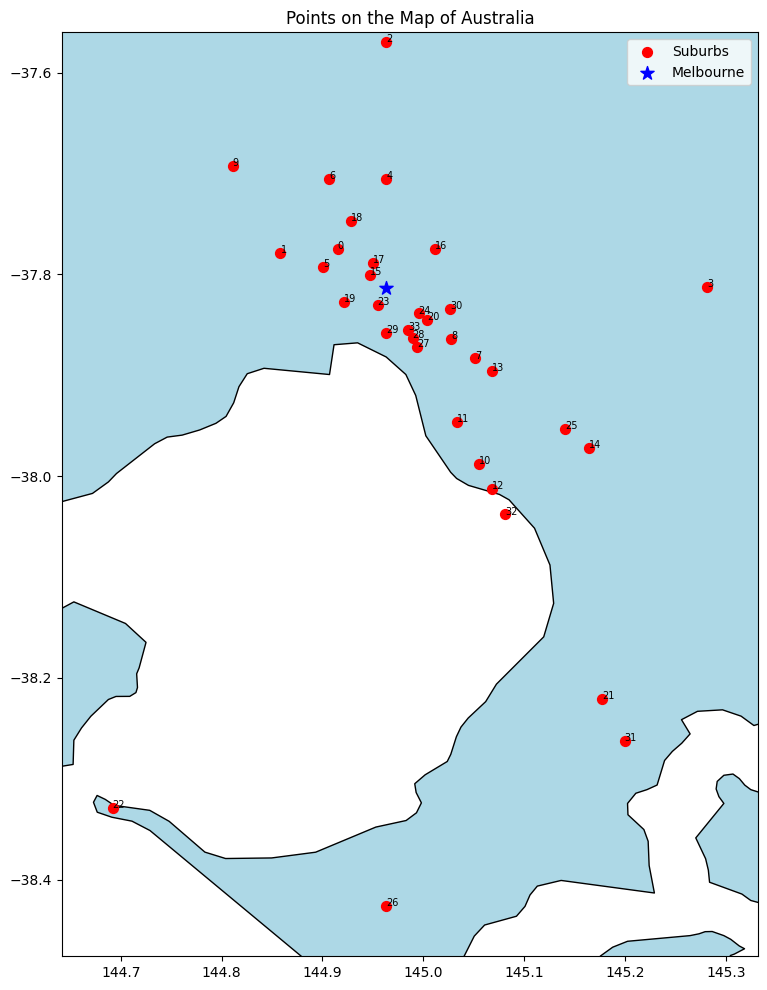

In [27]:
# Plot the suburbs on the map of Australia
suburb_plot(suburb_coords)

In [28]:
# print the suburb dictionary
suburb_dict = {i: df.iloc[0]['feature_value'] for i, df in enumerate(df_all)}
suburb_dict

{0: 'Ascot Vale (Suburb)',
 1: 'Braybrook (Suburb)',
 2: 'Craigieburn (Suburb)',
 3: 'Croydon (Suburb)',
 4: 'Fawkner (Suburb)',
 5: 'Footscray (Suburb)',
 6: 'Glenroy (Suburb)',
 7: 'Malvern East (Suburb)',
 8: 'Malvern (Suburb)',
 9: 'Melbourne Airport (Suburb)',
 10: 'Mentone (Suburb)',
 11: 'Moorabbin (Suburb)',
 12: 'Mordialloc (Suburb)',
 13: 'Murrumbeena (Suburb)',
 14: 'Noble Park (Suburb)',
 15: 'North Melbourne (Suburb)',
 16: 'Northcote (Suburb)',
 17: 'Parkville (Suburb)',
 18: 'Pascoe Vale South (Suburb)',
 19: 'Port Melbourne (Suburb)',
 20: 'Prahran (Suburb)',
 21: 'Somerville (Suburb)',
 22: 'Sorrento (Suburb)',
 23: 'South Melbourne (Suburb)',
 24: 'South Yarra (Suburb)',
 25: 'Springvale (Suburb)',
 26: 'St Andrews Beach (Suburb)',
 27: 'St Kilda East (Suburb)',
 28: 'St Kilda (Suburb)',
 29: 'St Kilda West (Suburb)',
 30: 'Toorak (Suburb)',
 31: 'Tyabb (Suburb)',
 32: 'Waterways (Suburb)',
 33: 'Windsor (Suburb)'}

In [29]:
# drop the trailing '(Suburb)' from the suburb names
suburb_dict = {k: v.replace(' (Suburb)', '') for k, v in suburb_dict.items()}
suburb_dict

{0: 'Ascot Vale',
 1: 'Braybrook',
 2: 'Craigieburn',
 3: 'Croydon',
 4: 'Fawkner',
 5: 'Footscray',
 6: 'Glenroy',
 7: 'Malvern East',
 8: 'Malvern',
 9: 'Melbourne Airport',
 10: 'Mentone',
 11: 'Moorabbin',
 12: 'Mordialloc',
 13: 'Murrumbeena',
 14: 'Noble Park',
 15: 'North Melbourne',
 16: 'Northcote',
 17: 'Parkville',
 18: 'Pascoe Vale South',
 19: 'Port Melbourne',
 20: 'Prahran',
 21: 'Somerville',
 22: 'Sorrento',
 23: 'South Melbourne',
 24: 'South Yarra',
 25: 'Springvale',
 26: 'St Andrews Beach',
 27: 'St Kilda East',
 28: 'St Kilda',
 29: 'St Kilda West',
 30: 'Toorak',
 31: 'Tyabb',
 32: 'Waterways',
 33: 'Windsor'}

In [30]:
# Combining the data from all the datasets
# modified temporary dataframes will have 'feature_name' and 'feature_value' columns

modified_dfs = [df[['feature_name', 'feature_value']] for df in df_all]

# modify each element of the modified_dfs list
# so that it is transposed and the first row is the feature_name and the second row is the feature_value
modified_dfs = [df.T for df in modified_dfs]

# set the first row as the column names
modified_dfs = [df.rename(columns=df.iloc[0]).drop(df.index[0]) for df in modified_dfs]

# add the suburb column to each dataframe
for i, df in enumerate(modified_dfs):
	df['suburb'] = suburb_dict[i]

# concatenate all the dataframes
combined_df = pandas.concat(modified_dfs)

# reset the index
combined_df.reset_index(drop=True, inplace=True)

combined_df

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",suburb
0,Ascot Vale (Suburb),Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,4.91257,3313.05218,Royal Melbourne Hospital,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,Ascot Vale
1,Braybrook (Suburb),Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,6.216803,2632.949379,Royal Melbourne Hospital,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,Braybrook
2,Craigieburn (Suburb),Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.97087,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,15.213189,9915.723721,The Northern Hospital,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,Craigieburn
3,Croydon (Suburb),Eastern Metropolitan,2,B4,28km E of Melbourne,1730.06483,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,9.413847,6149.574954,Maroondah Hospital,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,Croydon
4,Fawkner (Suburb),Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,12.004044,3799.03089,The Northern Hospital,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,Fawkner
5,Footscray (Suburb),Northern and Western Metropolitan,4,B3,6km WNW of Melbourne,2848.743284,9.394512,7.034739,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,5.651567,4252.700131,Royal Melbourne Hospital,7.261573,5.514839,878.066191,20.647263,2719.917638,63.957428,Footscray
6,Glenroy (Suburb),Northern and Western Metropolitan,4,B1,13km NNW of Melbourne,2352.122818,15.982083,14.687751,Moreland (C),Inner North West Primary Care Partnership,...,14.722128,5937.063365,Royal Melbourne Hospital,13.252894,12.72285,1063.320056,17.909865,3036.292274,51.141315,Glenroy
7,Malvern East (Suburb),Southern Metropolitan,1,D2,11km SE of Melbourne,2795.946571,13.811856,13.962712,Stonnington (C),Inner South East Partnership in Community & He...,...,8.006951,1653.697142,Monash Medical Centre (Clayton),8.746589,8.006951,324.067452,19.596542,847.427721,51.244433,Malvern East
8,Malvern (Suburb),Southern Metropolitan,1,C2,8km SE of Melbourne,3686.421646,11.983264,11.583241,Stonnington (C),Inner South East Partnership in Community & He...,...,12.26548,792.22707,The Alfred,7.386301,5.312177,155.249109,19.596542,405.972268,51.244433,Malvern
9,Melbourne Airport (Suburb),Northern and Western Metropolitan,1,E4,19km NW of Melbourne,5.200815,22.65084,24.572985,Hume (C),Hume-Whittlesea Primary Care Partnership,...,13.527362,42.865285,Royal Melbourne Hospital,19.921651,22.608084,8.837967,20.618005,22.056327,51.454988,Melbourne Airport


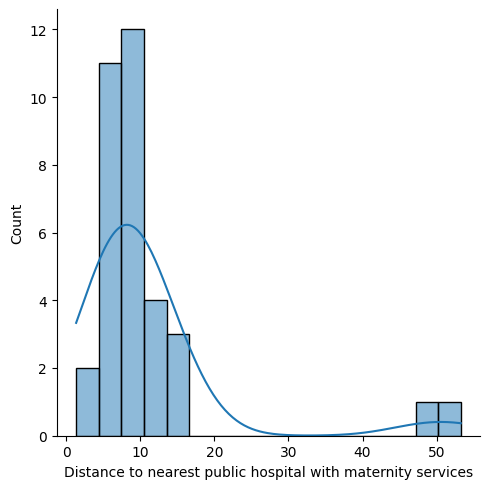

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of feature values for each feature name

sns.displot(combined_df['Distance to nearest public hospital with maternity services'], kde=True)

In [32]:
# create a feature category dictionary against {feature_category: [feature_names]}
feature_category_dict=df_all[0].groupby('feature_kind')['feature_name'].unique().to_dict()

In [33]:
# use the 'Land Use' feature category to plot the distribution of feature values for each feature name
land_use_features = feature_category_dict['Land Use']

combined_df[land_use_features]

,Commercial (km^2),Commercial (%),Industrial (km^2),Industrial (%),Residential (km^2),Residential (%),Rural (km^2),Rural (%),Other (km^2),Other (%)
0,0.11025,2.874503,0.005093,0.132784,2.894001,75.454089,0,0,0.826102,21.538624
1,1.013147,23.425767,0.177854,4.112305,2.198204,50.826408,0,0,0.93572,21.63552
2,0.782388,2.215516,1.763098,4.992626,4.486082,12.703395,1.935031,5.479494,26.347439,74.608969
3,0.228507,1.609852,0.407614,2.871681,10.370552,73.06156,0.041521,0.292517,3.146073,22.164391
4,0.123132,2.421885,0.168014,3.304669,3.661186,72.011763,0,0,1.131817,22.261683
5,0.412947,8.314224,0.35239,7.094986,2.122709,42.738377,0,0,2.078705,41.852413
6,0.140827,1.591747,0.092401,1.0444,5.724229,64.700094,0,0,2.88987,32.66376
7,0.435033,5.748787,0,0,5.350733,70.707841,0,0,1.781617,23.543372
8,0.129991,4.727724,0,0,2.309011,83.977777,0,0,0.310548,11.294499
9,0.021298,0.070105,0.109149,0.35928,0.006963,0.022921,7.050213,23.206867,23.192232,76.340827


In [34]:
# pick only the 'Land Use' features with '%' in their names
land_use_percent_features = [feature for feature in land_use_features if '%' in feature]
df_land_use_percent = combined_df[land_use_percent_features]/100

df_land_use_percent

,Commercial (%),Industrial (%),Residential (%),Rural (%),Other (%)
0,0.028745,0.001328,0.754541,0.0,0.215386
1,0.234258,0.041123,0.508264,0.0,0.216355
2,0.022155,0.049926,0.127034,0.054795,0.74609
3,0.016099,0.028717,0.730616,0.002925,0.221644
4,0.024219,0.033047,0.720118,0.0,0.222617
5,0.083142,0.07095,0.427384,0.0,0.418524
6,0.015917,0.010444,0.647001,0.0,0.326638
7,0.057488,0.0,0.707078,0.0,0.235434
8,0.047277,0.0,0.839778,0.0,0.112945
9,0.000701,0.003593,0.000229,0.232069,0.763408


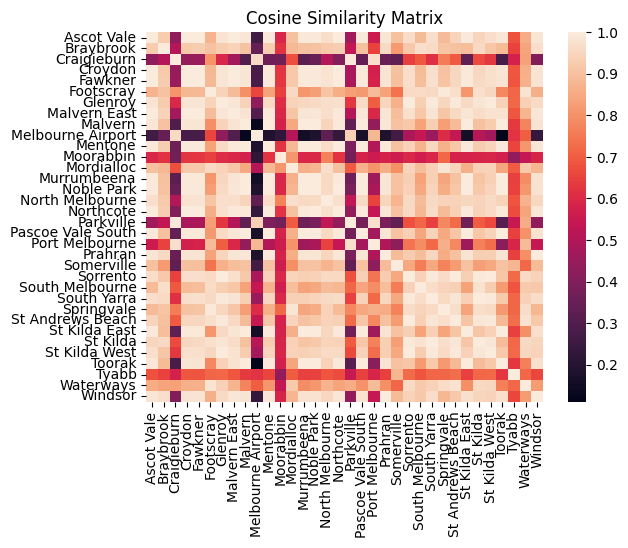

In [35]:
# compute similarity between the suburbs based on the 'Land Use' features
# use the cosine similarity metric
from sklearn.metrics.pairwise import cosine_similarity

# compute the cosine similarity matrix
cosine_sim = cosine_similarity(df_land_use_percent)

# plot as a heatmap
sns.heatmap(cosine_sim, annot=False, xticklabels=suburb_dict.values(), yticklabels=suburb_dict.values())
plt.title('Cosine Similarity Matrix')
plt.show()


In [36]:
# get the 75th percentile of cosine similarity values
percentile_75 = np.percentile(cosine_sim, 50)
percentile_75

np.float64(0.9068334730590706)

In [37]:
# pick top 5 similar suburbs for each suburb
similar_suburbs = {}
for i, suburb in enumerate(suburb_dict.values()):
	# get the cosine similarity values for the current suburb
	sim_values = cosine_sim[i]
	# get the indices of the top 5 similar suburbs
	top_5_similar_indices = np.argpartition(sim_values, -6)[-6:]
	# get the top 5 similar suburbs
	similar_suburbs[suburb] = [list(suburb_dict.values())[j] for j in top_5_similar_indices if i != j]

similar_suburbs


{'Ascot Vale': ['Noble Park',
  'Malvern East',
  'Northcote',
  'Fawkner',
  'Croydon'],
 'Braybrook': ['St Kilda',
  'Prahran',
  'South Yarra',
  'Windsor',
  'South Melbourne'],
 'Craigieburn': ['Footscray',
  'Waterways',
  'Melbourne Airport',
  'Port Melbourne',
  'Parkville'],
 'Croydon': ['Noble Park',
  'Malvern East',
  'Northcote',
  'Ascot Vale',
  'Fawkner'],
 'Fawkner': ['Mentone', 'Malvern East', 'Northcote', 'Ascot Vale', 'Croydon'],
 'Footscray': ['South Melbourne',
  'St Andrews Beach',
  'St Kilda',
  'Waterways',
  'Springvale'],
 'Glenroy': ['Malvern East',
  'St Andrews Beach',
  'South Yarra',
  'Sorrento',
  'St Kilda West'],
 'Malvern East': ['Mentone', 'Northcote', 'Croydon', 'Fawkner', 'Ascot Vale'],
 'Malvern': ['Noble Park',
  'St Kilda East',
  'Pascoe Vale South',
  'Murrumbeena',
  'Toorak'],
 'Melbourne Airport': ['Footscray',
  'Waterways',
  'Port Melbourne',
  'Parkville',
  'Craigieburn'],
 'Mentone': ['Malvern',
  'Pascoe Vale South',
  'Murrumbee

Text(0.5, 1.0, 'Haversine Distance Matrix')

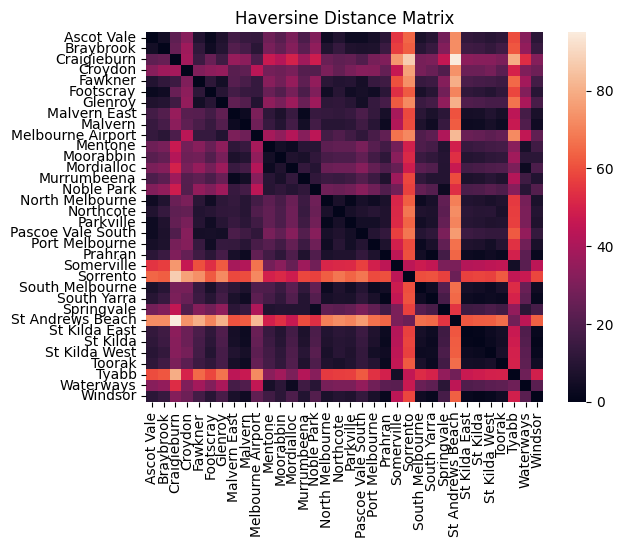

In [38]:
# compute top 5 closest based on distance
# use the haversine distance metric
from geopy.distance import geodesic

# compute the haversine distance matrix
haversine_dist = np.zeros((len(suburb_coords), len(suburb_coords)))
for i, (lat1, lon1) in enumerate(suburb_coords):
	for j, (lat2, lon2) in enumerate(suburb_coords):
		haversine_dist[i, j] = geodesic((lat1, lon1), (lat2, lon2)).kilometers

# plot as a heatmap
sns.heatmap(haversine_dist, annot=False, xticklabels=suburb_dict.values(), yticklabels=suburb_dict.values())
plt.title('Haversine Distance Matrix')



In [39]:
# pick top 5 closest suburbs for each suburb
closest_suburbs = {}
for i, suburb in enumerate(suburb_dict.values()):
	# get the haversine distance values for the current suburb
	dist_values = haversine_dist[i]
	# get the indices of the top 5 closest suburbs
	top_5_closest_indices = np.argpartition(dist_values, 6)[:6]
	# get the top 5 closest suburbs
	closest_suburbs[suburb] = [list(suburb_dict.values())[j] for j in top_5_closest_indices if i != j]

closest_suburbs


{'Ascot Vale': ['Footscray',
  'Pascoe Vale South',
  'Parkville',
  'North Melbourne',
  'Braybrook'],
 'Braybrook': ['Footscray',
  'Ascot Vale',
  'Pascoe Vale South',
  'Port Melbourne',
  'Parkville'],
 'Craigieburn': ['Fawkner',
  'Glenroy',
  'Melbourne Airport',
  'Pascoe Vale South',
  'Ascot Vale'],
 'Croydon': ['Springvale',
  'Noble Park',
  'Murrumbeena',
  'Malvern East',
  'Toorak'],
 'Fawkner': ['Glenroy',
  'Pascoe Vale South',
  'Ascot Vale',
  'Northcote',
  'Parkville'],
 'Footscray': ['Ascot Vale',
  'Braybrook',
  'North Melbourne',
  'Port Melbourne',
  'Parkville'],
 'Glenroy': ['Fawkner',
  'Pascoe Vale South',
  'Ascot Vale',
  'Melbourne Airport',
  'Braybrook'],
 'Malvern East': ['Murrumbeena',
  'Malvern',
  'St Kilda East',
  'Toorak',
  'St Kilda'],
 'Malvern': ['Prahran', 'Malvern East', 'St Kilda East', 'Toorak', 'St Kilda'],
 'Melbourne Airport': ['Glenroy',
  'Braybrook',
  'Pascoe Vale South',
  'Ascot Vale',
  'Fawkner'],
 'Mentone': ['Mordialloc',


In [40]:
# compute the overlap between the top 5 similar suburbs and the top 5 closest suburbs
overlap_suburbs = {suburb: set(similar_suburbs[suburb]) & set(closest_suburbs[suburb]) for suburb in suburb_dict.values()}
overlap_suburbs

{'Ascot Vale': set(),
 'Braybrook': set(),
 'Craigieburn': {'Melbourne Airport'},
 'Croydon': {'Malvern East', 'Noble Park'},
 'Fawkner': {'Ascot Vale', 'Northcote'},
 'Footscray': set(),
 'Glenroy': set(),
 'Malvern East': set(),
 'Malvern': {'St Kilda East', 'Toorak'},
 'Melbourne Airport': set(),
 'Mentone': {'Noble Park'},
 'Moorabbin': {'Mordialloc'},
 'Mordialloc': {'Springvale'},
 'Murrumbeena': {'Malvern', 'St Kilda East', 'Toorak'},
 'Noble Park': {'Mentone'},
 'North Melbourne': set(),
 'Northcote': set(),
 'Parkville': {'Footscray', 'Port Melbourne'},
 'Pascoe Vale South': set(),
 'Port Melbourne': {'Footscray', 'Parkville'},
 'Prahran': {'Malvern', 'Windsor'},
 'Somerville': {'Mentone', 'Noble Park'},
 'Sorrento': {'St Andrews Beach'},
 'South Melbourne': {'South Yarra'},
 'South Yarra': {'St Kilda', 'St Kilda West'},
 'Springvale': {'Mordialloc'},
 'St Andrews Beach': {'Sorrento'},
 'St Kilda East': {'Malvern'},
 'St Kilda': {'South Yarra', 'St Kilda West'},
 'St Kilda Wes

In [41]:
# compute the overlap percentage
overlap_percentage = {suburb: len(overlap_suburbs[suburb])/5*100 for suburb in suburb_dict.values()}
overlap_percentage


{'Ascot Vale': 0.0,
 'Braybrook': 0.0,
 'Craigieburn': 20.0,
 'Croydon': 40.0,
 'Fawkner': 40.0,
 'Footscray': 0.0,
 'Glenroy': 0.0,
 'Malvern East': 0.0,
 'Malvern': 40.0,
 'Melbourne Airport': 0.0,
 'Mentone': 20.0,
 'Moorabbin': 20.0,
 'Mordialloc': 20.0,
 'Murrumbeena': 60.0,
 'Noble Park': 20.0,
 'North Melbourne': 0.0,
 'Northcote': 0.0,
 'Parkville': 40.0,
 'Pascoe Vale South': 0.0,
 'Port Melbourne': 40.0,
 'Prahran': 40.0,
 'Somerville': 40.0,
 'Sorrento': 20.0,
 'South Melbourne': 20.0,
 'South Yarra': 40.0,
 'Springvale': 20.0,
 'St Andrews Beach': 20.0,
 'St Kilda East': 20.0,
 'St Kilda': 40.0,
 'St Kilda West': 40.0,
 'Toorak': 20.0,
 'Tyabb': 40.0,
 'Waterways': 20.0,
 'Windsor': 20.0}

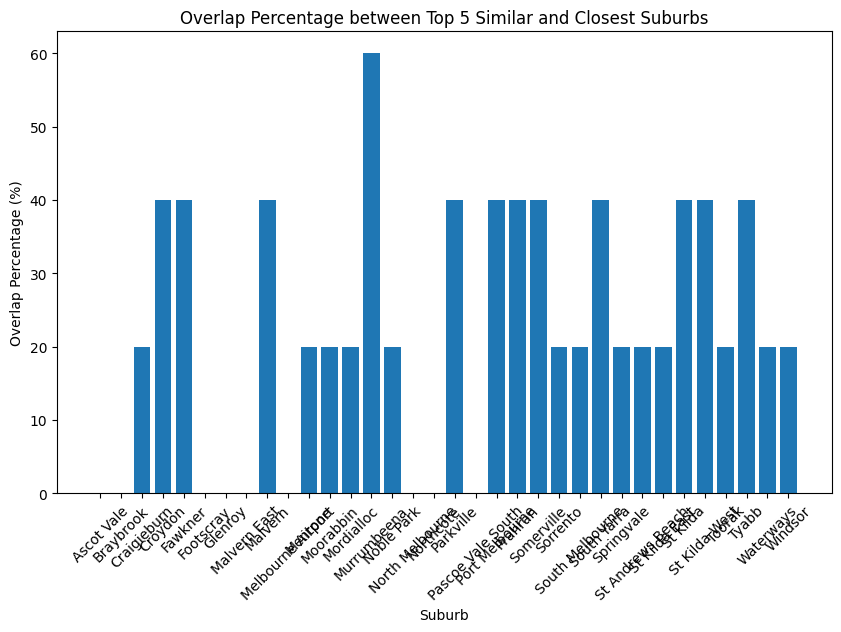

In [42]:
# plot the overlap percentage as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(overlap_percentage.keys(), overlap_percentage.values())
plt.xlabel('Suburb')
plt.ylabel('Overlap Percentage (%)')
plt.title('Overlap Percentage between Top 5 Similar and Closest Suburbs')
plt.xticks(rotation=45)
plt.show()

In [43]:
# count non-zero overlap percentage
non_zero_overlap = sum(1 for val in overlap_percentage.values() if val > 0)
non_zero_overlap/len(overlap_percentage)*100


73.52941176470588

0.13153735502357952


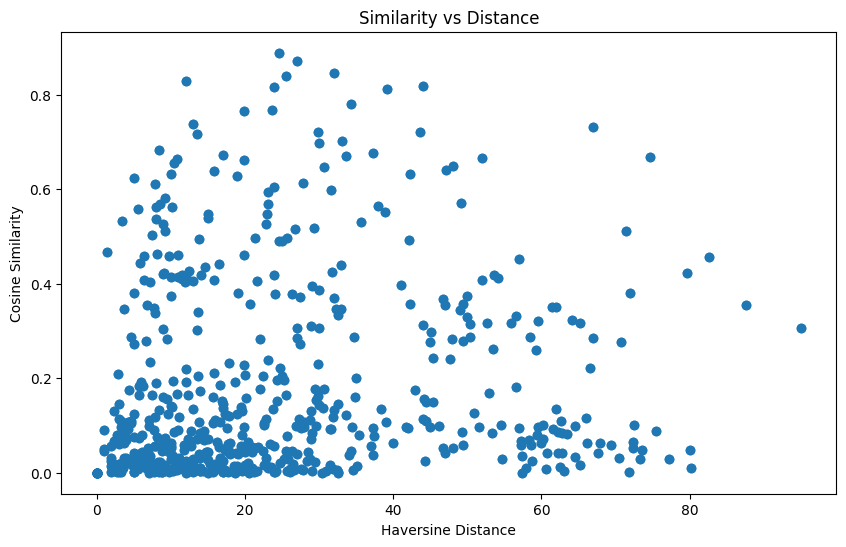

In [44]:
# now let's do a correlation analysis Similarity vs Distance
# use cosine_similarity as the similarity metric and haversine distance as the distance metric
# compute the correlation coefficient between the similarity and distance matrices

# flatten the matrices
cosine_sim_flat = 1-cosine_sim.flatten()
haversine_dist_flat = haversine_dist.flatten()

# compute the correlation coefficient
correlation_coeff = np.corrcoef(cosine_sim_flat, haversine_dist_flat)[0, 1]
print(correlation_coeff)

# plot the similarity vs distance
plt.figure(figsize=(10, 6))
plt.scatter(haversine_dist_flat, cosine_sim_flat)
plt.xlabel('Haversine Distance')
plt.ylabel('Cosine Similarity')
plt.title('Similarity vs Distance')
plt.show()


0.15384036496230008


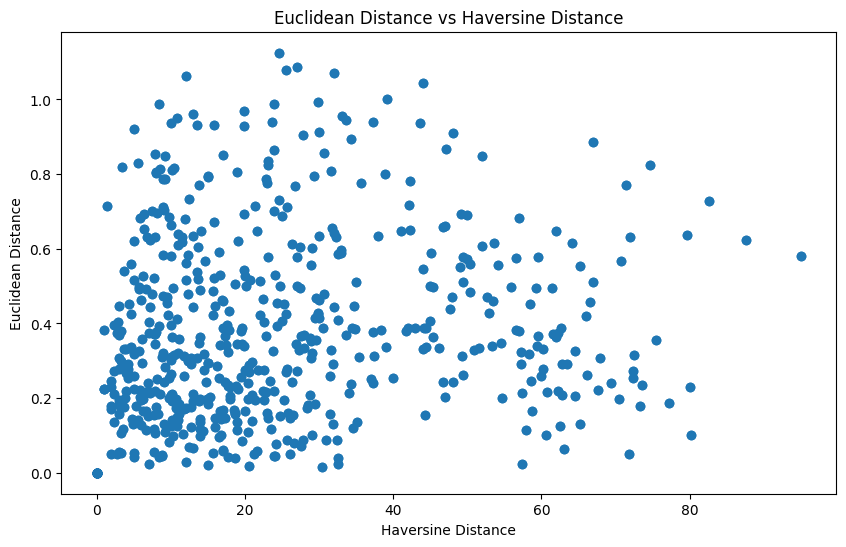

In [45]:
# let's try changing cosine similarity to Euclidean distance
# compute the Euclidean distance matrix between the pairwise vectors of the 'Land Use' features
from sklearn.metrics.pairwise import euclidean_distances

# compute the Euclidean distance matrix
euclidean_dist = euclidean_distances(df_land_use_percent)

# flatten the matrices
euclidean_dist_flat = euclidean_dist.flatten()

# compute the correlation coefficient
correlation_coeff = np.corrcoef(euclidean_dist_flat, haversine_dist_flat)[0, 1]
print(correlation_coeff)

# plot the Euclidean distance vs haversine distance
plt.figure(figsize=(10, 6))
plt.scatter(haversine_dist_flat, euclidean_dist_flat)
plt.xlabel('Haversine Distance')
plt.ylabel('Euclidean Distance')
plt.title('Euclidean Distance vs Haversine Distance')
plt.show()

In [46]:
len(haversine_dist_flat)


1156

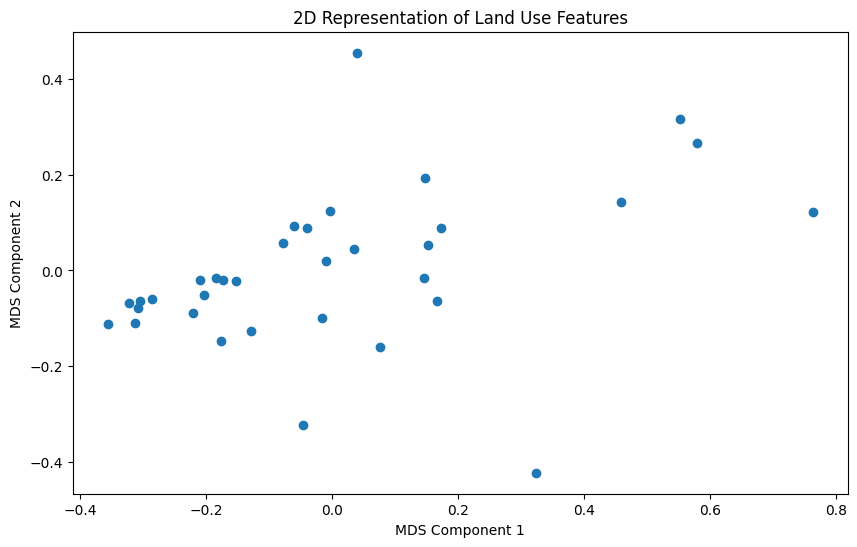

In [47]:
# do a multidimensional scaling (MDS) analysis to visualize the Land Use features in 2D
from sklearn.manifold import MDS

# initialize the MDS model
mds = MDS(n_components=2, dissimilarity='precomputed')

# fit the MDS model
land_use_2d = mds.fit_transform(euclidean_dist)

# plot the 2D representation of the Land Use features
plt.figure(figsize=(10, 6))
plt.scatter(land_use_2d[:, 0], land_use_2d[:, 1])
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('2D Representation of Land Use Features')
plt.show()


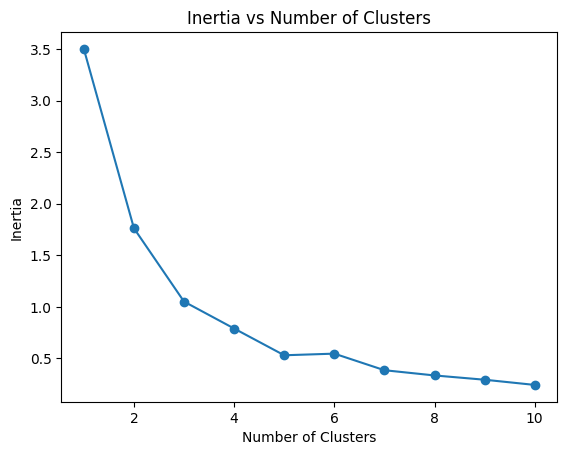

In [48]:
# run a KMeans clustering on the Land Use features with elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans

# initialize the KMeans model
kmeans = KMeans()

# fit the KMeans model with the Land Use features
kmeans.fit(df_land_use_percent)

# plot the inertia (sum of squared distances to the closest cluster center) vs number of clusters
inertia = []
for n_clusters in range(1, 11):
	kmeans = KMeans(n_clusters=n_clusters)
	kmeans.fit(df_land_use_percent)
	inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()


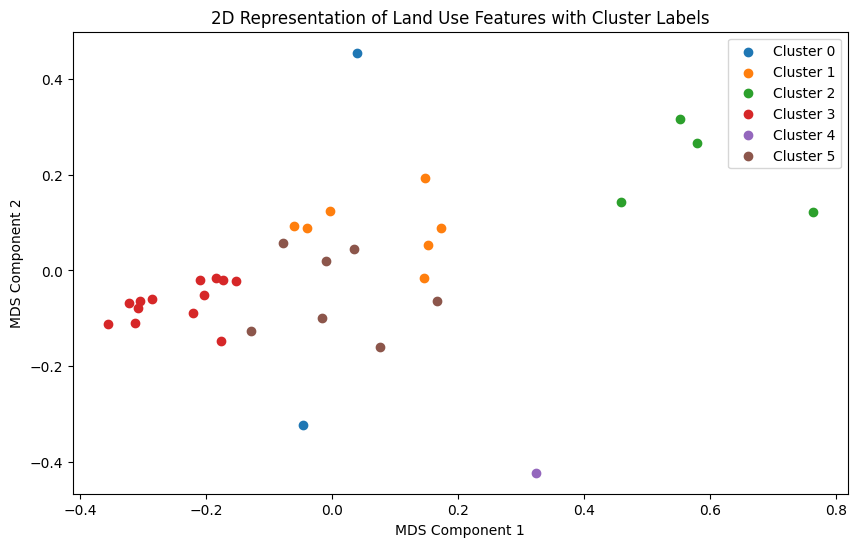

In [49]:
# 6 seems to be the optimal number of clusters
# re-run KMeans with 6 clusters
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_land_use_percent)

# get the cluster labels
cluster_labels = kmeans.labels_

# plot the 2D representation of the Land Use features with cluster labels
plt.figure(figsize=(10, 6))
for i in range(6):
	plt.scatter(land_use_2d[cluster_labels == i, 0], land_use_2d[cluster_labels == i, 1], label=f'Cluster {i}')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('2D Representation of Land Use Features with Cluster Labels')
plt.legend()
plt.show()


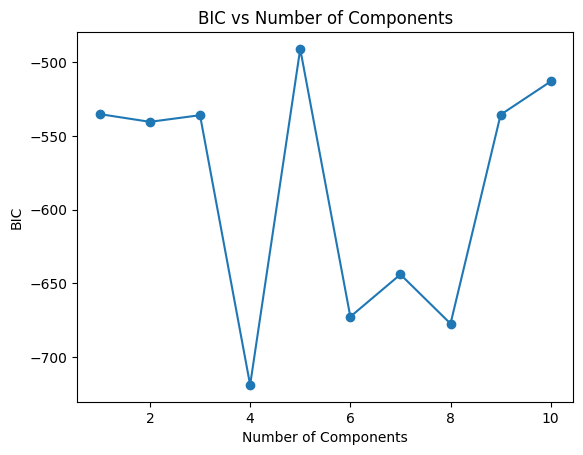

In [50]:
# use GMM clustering to determine the optimal number of clusters
from sklearn.mixture import GaussianMixture

# initialize the GaussianMixture model
gmm = GaussianMixture()

# fit the GaussianMixture model with the Land Use features
gmm.fit(df_land_use_percent)

# plot the BIC (Bayesian Information Criterion) vs number of components
bic = []
for n_components in range(1, 11):
	gmm = GaussianMixture(n_components=n_components)
	gmm.fit(df_land_use_percent)
	bic.append(gmm.bic(df_land_use_percent))
plt.plot(range(1, 11), bic, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC vs Number of Components')
plt.show()


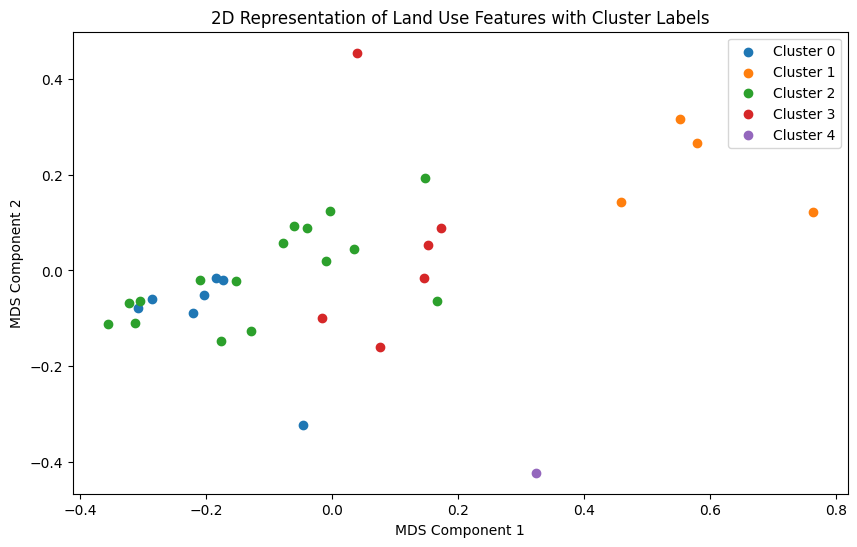

In [51]:
# best number of components seems to be 5
# re-run GMM with 5 components
gmm = GaussianMixture(n_components=5)
gmm.fit(df_land_use_percent)

# get the cluster labels
cluster_labels = gmm.predict(df_land_use_percent)

# plot the 2D representation of the Land Use features with cluster labels
plt.figure(figsize=(10, 6))
for i in range(5):
	plt.scatter(land_use_2d[cluster_labels == i, 0], land_use_2d[cluster_labels == i, 1], label=f'Cluster {i}')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('2D Representation of Land Use Features with Cluster Labels')
plt.legend()


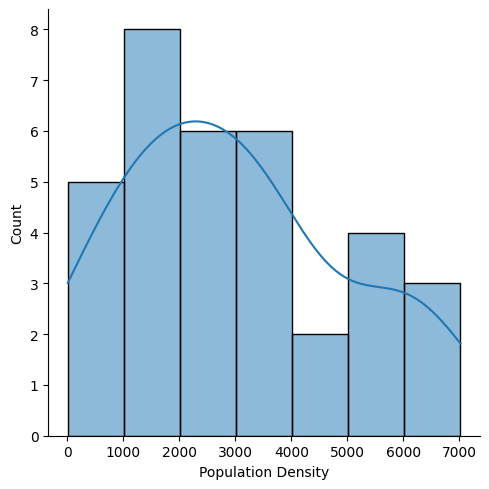

In [52]:
# displot for population density
sns.displot(combined_df['Population Density'], kde=True)



C:\Users\subha\AppData\Local\Temp\ipykernel_13684\966991488.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  population_density_sim[i, j] = pop_density_sim


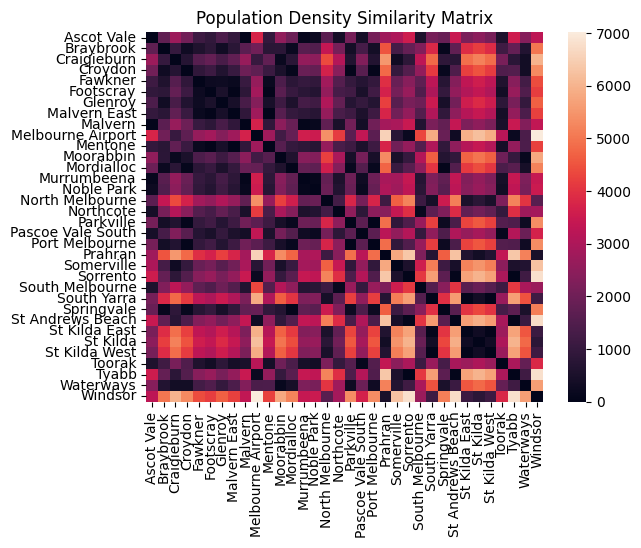

In [53]:
# similarity for population density
def sim(x, y):
	return np.abs(x-y)

# compute similarity between the suburbs based on the 'Population Density' feature
# use the custom similarity metric
population_density = combined_df['Population Density'].values
population_density = population_density.reshape(-1, 1)
population_density_sim = np.zeros((len(suburb_coords), len(suburb_coords)))
for i in range(len(suburb_coords)):
	for j in range(len(suburb_coords)):
		pop_density_sim = sim(population_density[i], population_density[j])
		population_density_sim[i, j] = pop_density_sim

# plot as a heatmap
sns.heatmap(population_density_sim, annot=False, xticklabels=suburb_dict.values(), yticklabels=suburb_dict.values())
plt.title('Population Density Similarity Matrix')
plt.show()



0.21449462891580454


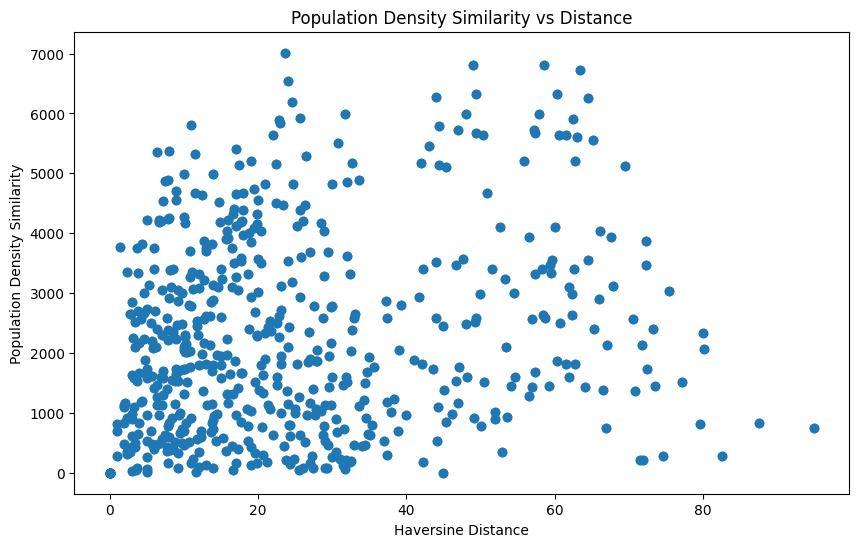

In [54]:
# compute the correlation coefficient between the population density similarity and haversine distance matrices
population_density_sim_flat = population_density_sim.flatten()

# compute the correlation coefficient
correlation_coeff = np.corrcoef(population_density_sim_flat, haversine_dist_flat)[0, 1]
print(correlation_coeff)

# plot the population density similarity vs haversine distance
plt.figure(figsize=(10, 6))
plt.scatter(haversine_dist_flat, population_density_sim_flat)
plt.xlabel('Haversine Distance')
plt.ylabel('Population Density Similarity')
plt.title('Population Density Similarity vs Distance')
plt.show()

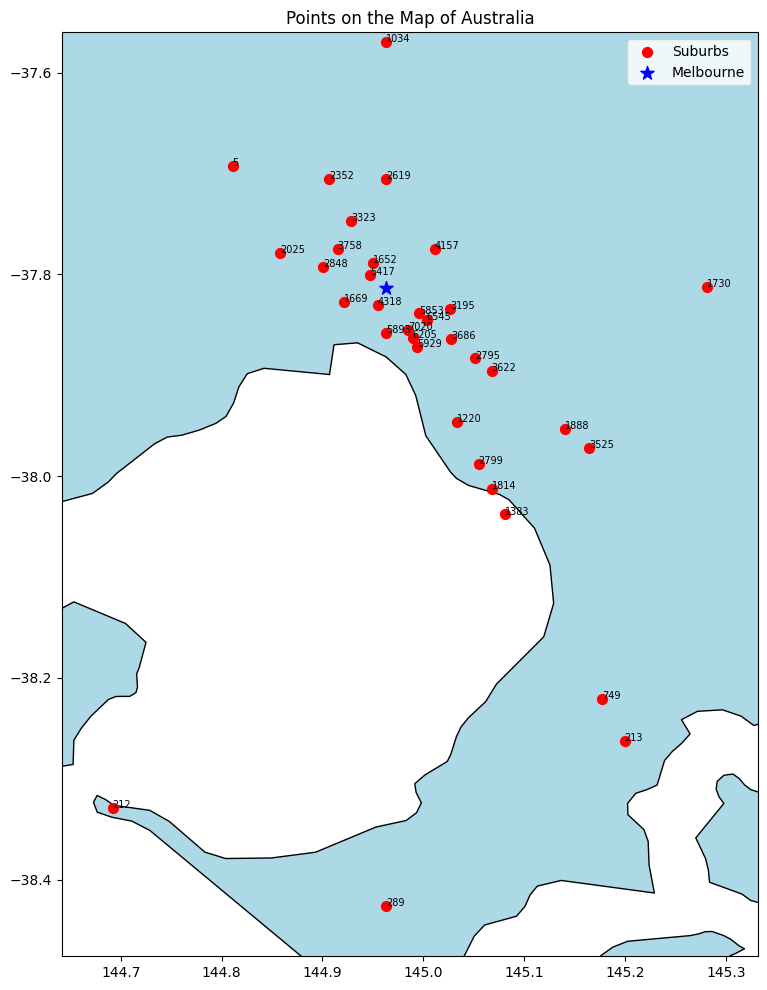

In [55]:
# show population density for each suburb on the map, with map markers scaled by population density
# plot the suburbs on the map of Australia
# modify the suburb_plot function to include the population density as the marker size

def suburb_plot_popDensity(lat_lon_pairs, map_path="country_high_res/ne_10m_admin_0_countries.shp", population_density=None):
	# Create a GeoDataFrame with the latitude and longitude pairs
	data = {'latitude': [pair[0] for pair in lat_lon_pairs],
			'longitude': [pair[1] for pair in lat_lon_pairs]}
	geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
	gdf = gpd.GeoDataFrame(data, geometry=geometry)
	

	# Load the world map from the downloaded shapefile
	world = gpd.read_file(map_path)

	# Filter for Australia only
	australia = world[world['NAME'] == 'Australia']

	# Plotting the map of Australia and the points
	fig, ax = plt.subplots(figsize=(12, 12))
	australia.plot(ax=ax, color='lightblue', edgecolor='black')
	gdf.plot(ax=ax, color='red', markersize=50)
	
	ax.set_xlim([min_lon-0.05, max_lon+0.05])
	ax.set_ylim([min_lat-0.05, max_lat+0.01])
	# plot melbourne with a different color
	melbourne = gpd.GeoDataFrame({'city': ['Melbourne'], 'latitude': [-37.81336105022706], 'longitude': [144.9632650646953]}, geometry=[Point(144.9632650646953, -37.81336105022706)])
	# marker shape for melbourne is a star
	melbourne.plot(ax=ax, color='blue', markersize=100, marker='*')
	# put numbers on the markers for the suburbs
	for i, txt in enumerate(data['latitude']):
		ax.annotate(int(population_density[i]), (data['longitude'][i], data['latitude'][i]), color='black',fontsize=7)
	plt.title('Points on the Map of Australia')
	plt.legend(['Suburbs', 'Melbourne'])
	plt.show()


# Plot the suburbs on the map of Australia with population density as the marker size
suburb_plot_popDensity(suburb_coords, population_density=combined_df['Population Density'].values)

	

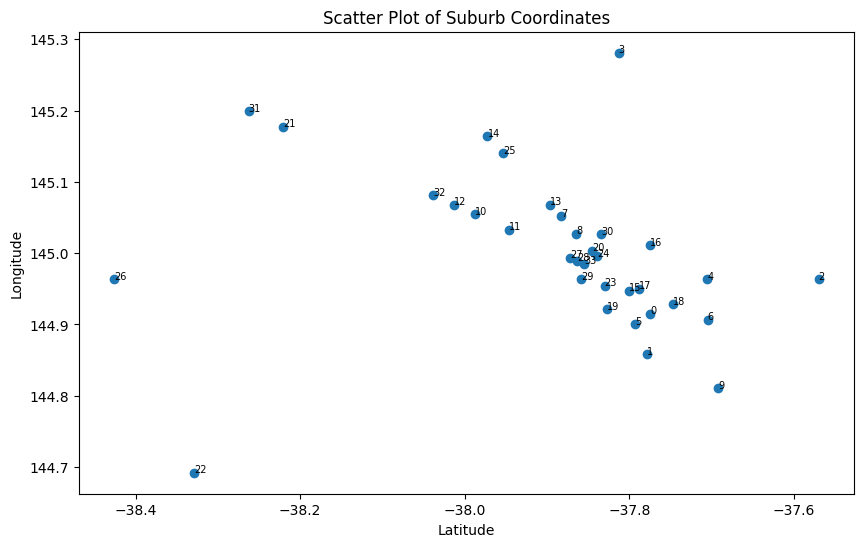

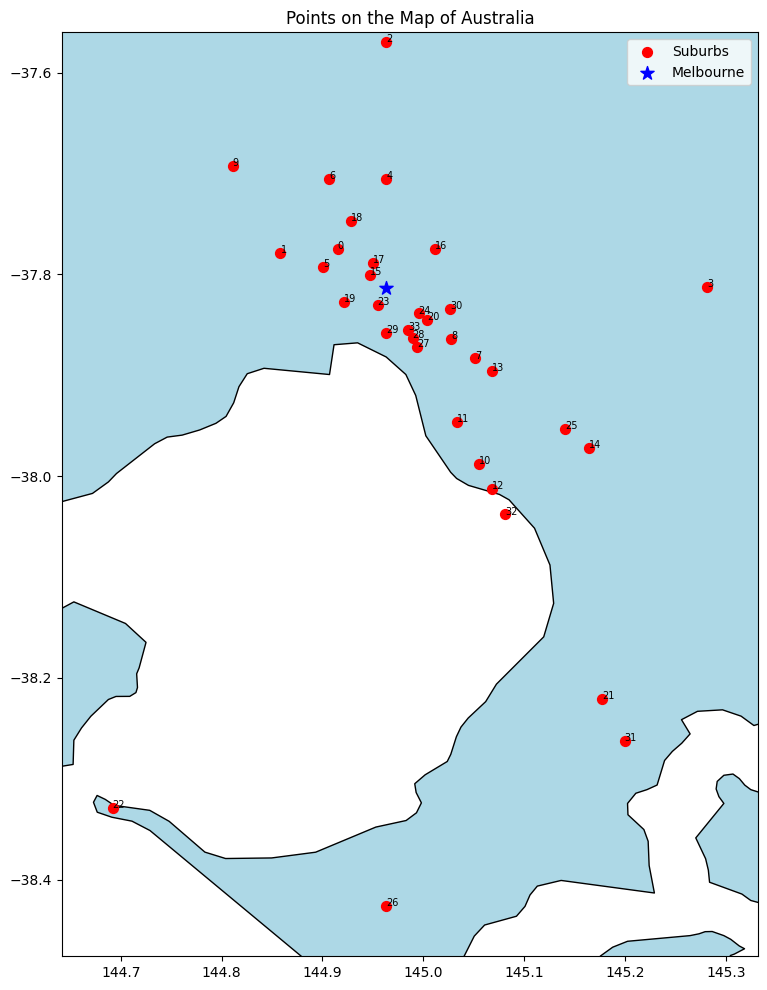

In [56]:
# plot the co-ordinates of the suburbs on a simple scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, longitudes)
# annotate the points with the suburb names
for i, txt in enumerate(suburb_dict.values()):
	plt.annotate(i, (latitudes[i], longitudes[i]), fontsize=7)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Suburb Coordinates')
plt.show()

suburb_plot(suburb_coords)

[6.008546291080561, 9.996766372390038, 27.02652566134284, 28.01454721238114, 12.02653053597277, 5.996796528693809, 13.018962081856625, 10.991562183134008, 7.991576575518784, 19.008498325412226, 20.981072515891178, 15.981076660759138, 23.981070858593615, 12.991556280951858, 24.991540705860242, 2.008685959489503, 6.0290372250806294, 3.0190328006093337, 8.018975394032472, 3.9764674008306997, 4.9916082677811655, 48.98106494269586, 61.96993500903814, 1.969937651009705, 3.991629418062739, 21.991543006118636, 67.97347980084999, 6.981099083421297, 5.981105740285352, 4.973499485182993, 6.003354121843681, 53.9810644170619, 26.981069569841733, 4.981115069977135]


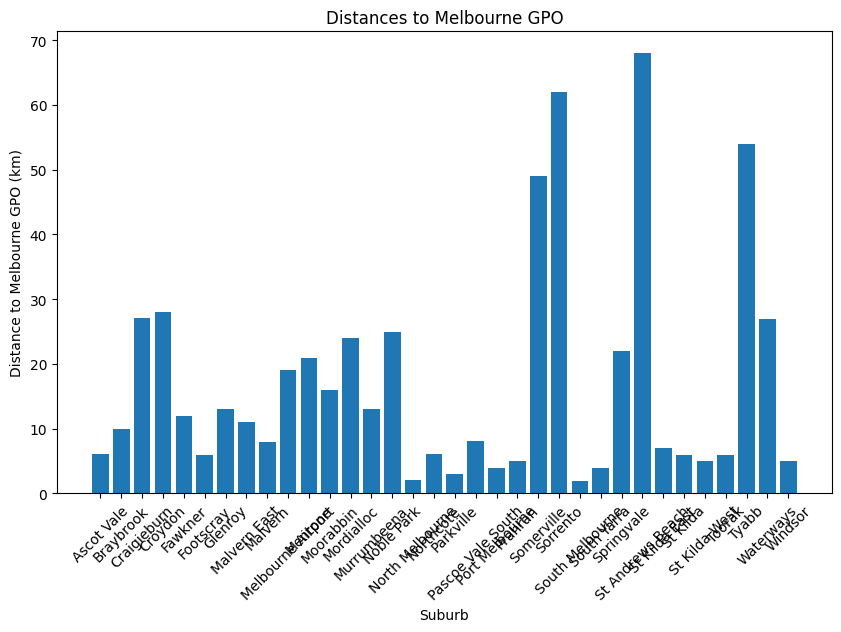

In [57]:
# compute distances from the Melbourne GPO to the suburbs
melbourne_gpo = GeoPoint(-37.8136, 144.9631)
distances_to_melbourne = [geodesic(melbourne_gpo, (lat, lon)).kilometers for lat, lon in suburb_coords]
print(distances_to_melbourne)

# plot the distances from Melbourne GPO to the suburbs
plt.figure(figsize=(10, 6))
plt.bar(suburb_dict.values(), distances_to_melbourne)
plt.xlabel('Suburb')
plt.ylabel('Distance to Melbourne GPO (km)')
plt.title('Distances to Melbourne GPO')
plt.xticks(rotation=45)
plt.show()

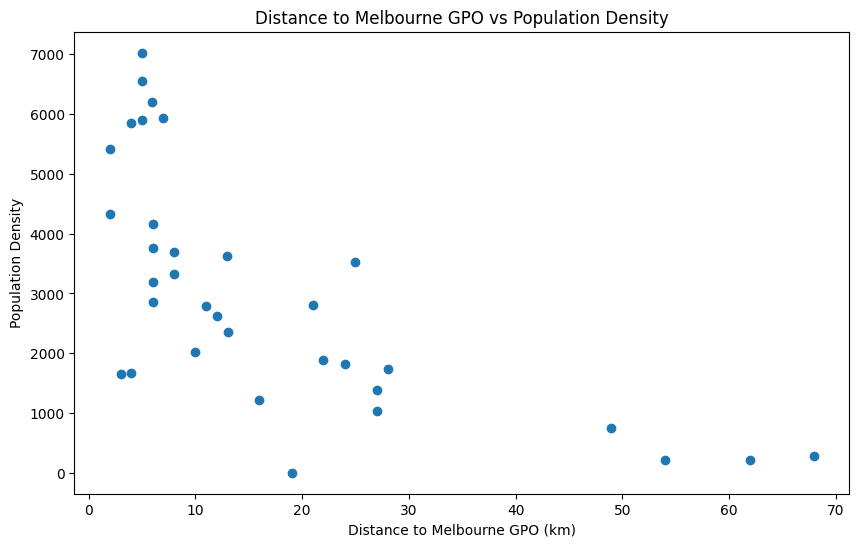

In [58]:
# plot distance vs population density
plt.figure(figsize=(10, 6))
plt.scatter(distances_to_melbourne, combined_df['Population Density'])
plt.xlabel('Distance to Melbourne GPO (km)')
plt.ylabel('Population Density')
plt.title('Distance to Melbourne GPO vs Population Density')
plt.show()


C:\Users\subha\AppData\Local\Temp\ipykernel_13684\1541990137.py:6: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


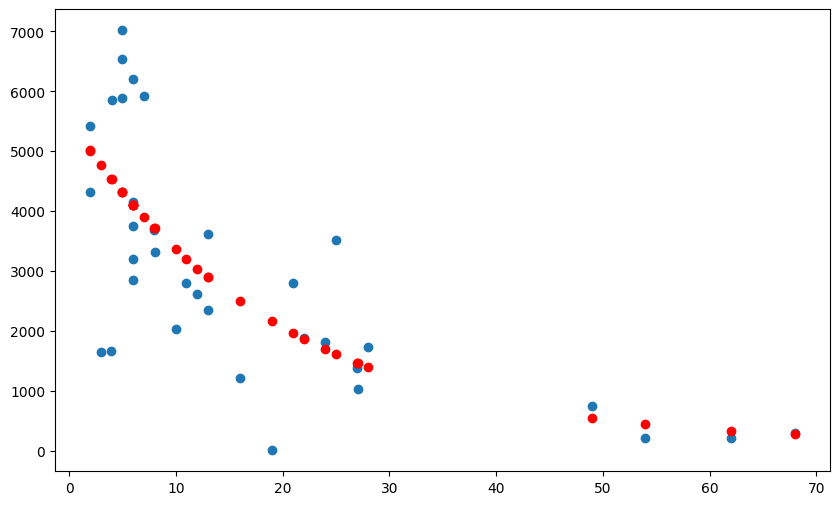

In [59]:
# fit an exponential regression model to the distance vs population density data
from scipy.optimize import curve_fit

# define the exponential function
def exponential_func(x, a, b, c):
	return a * np.exp(-b * x) + c

# Target=Population Density
# Independent=Distance to Melbourne GPO
# fit the exponential function to the data

target = combined_df['Population Density'].values
independent = distances_to_melbourne

# fit the exponential function to the data
popt, pcov = curve_fit(exponential_func, independent, target)

# plot the exponential regression model
plt.figure(figsize=(10, 6))
plt.scatter(independent, target)

for i in range(len(independent)):
	plt.plot(independent[i], exponential_func(independent[i], popt[0], popt[1], popt[2]), 'ro')
	

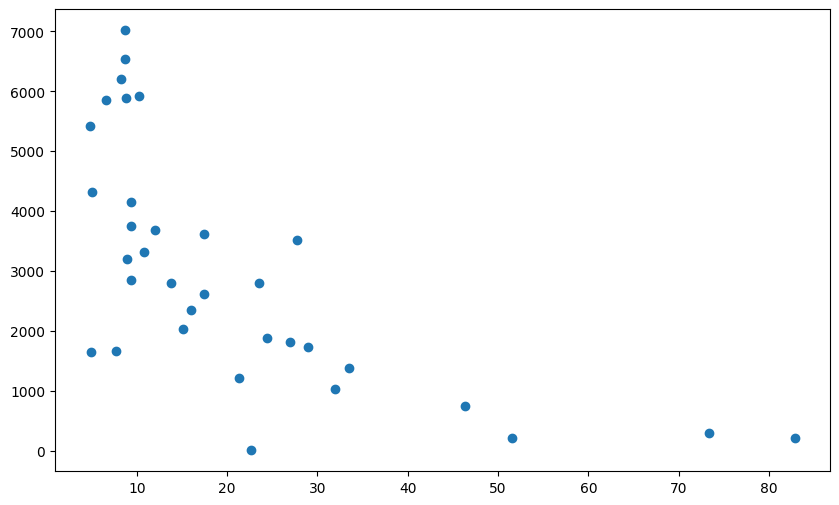

In [60]:
# plot travel time to Melbourne CBD vs population density

plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Travel time to GPO (minutes)'], combined_df['Population Density'])


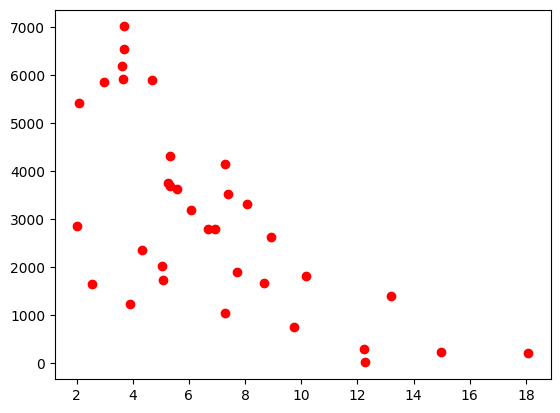

In [61]:
plt.plot(combined_df['Travel time to nearest public hospital'], combined_df['Population Density'], 'ro')

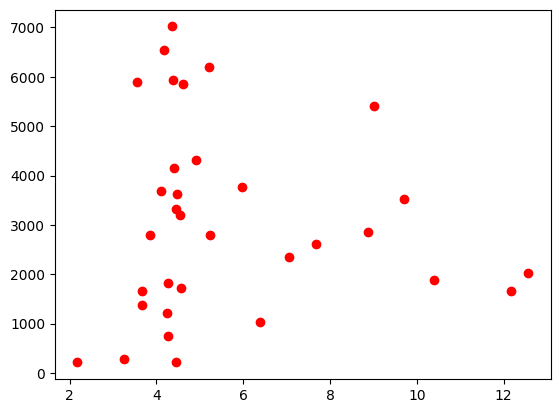

In [62]:
plt.plot(combined_df['Unemployed, %'], combined_df['Population Density'], 'ro')

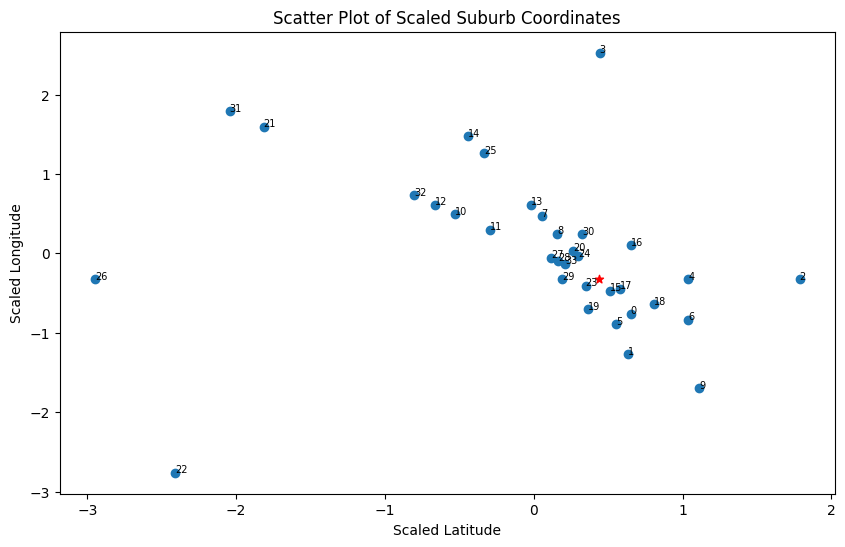

In [63]:
# normalize geographical coordinates
from sklearn.preprocessing import StandardScaler

# initialize the StandardScaler
scaler = StandardScaler()

# fit the StandardScaler with the suburb coordinates
scaler.fit(suburb_coords)

# transform the suburb coordinates
suburb_coords_scaled = scaler.transform(suburb_coords)

# plot the scaled suburb coordinates
plt.figure(figsize=(10, 6))
plt.scatter(suburb_coords_scaled[:, 0], suburb_coords_scaled[:, 1])
# scaled coordinates of melbourne GPO
melbourne_coords_tup = (melbourne_coords.latitude, melbourne_coords.longitude)
melbourne_coords_scaled = scaler.transform([melbourne_coords_tup])
# annotate the points with the suburb names
for i, txt in enumerate(suburb_dict.values()):
	plt.annotate(i, (suburb_coords_scaled[i, 0], suburb_coords_scaled[i, 1]), fontsize=7)

plt.scatter(melbourne_coords_scaled[:, 0], melbourne_coords_scaled[:, 1], color='red', marker='*')
plt.xlabel('Scaled Latitude')
plt.ylabel('Scaled Longitude')
plt.title('Scatter Plot of Scaled Suburb Coordinates')
plt.show()


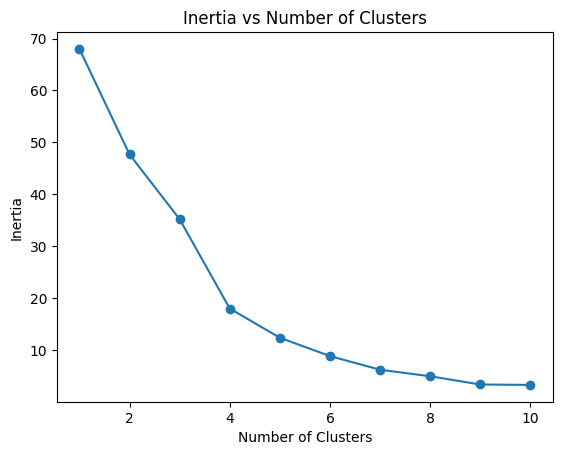

In [64]:
# run a KMeans clustering on the scaled suburb coordinates with elbow method to determine the optimal number of clusters
# initialize the KMeans model
kmeans = KMeans()

# fit the KMeans model with the scaled suburb coordinates
kmeans.fit(suburb_coords_scaled)

# plot the inertia (sum of squared distances to the closest cluster center) vs number of clusters
inertia = []
for n_clusters in range(1, 11):
	kmeans = KMeans(n_clusters=n_clusters)
	kmeans.fit(suburb_coords_scaled)
	inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

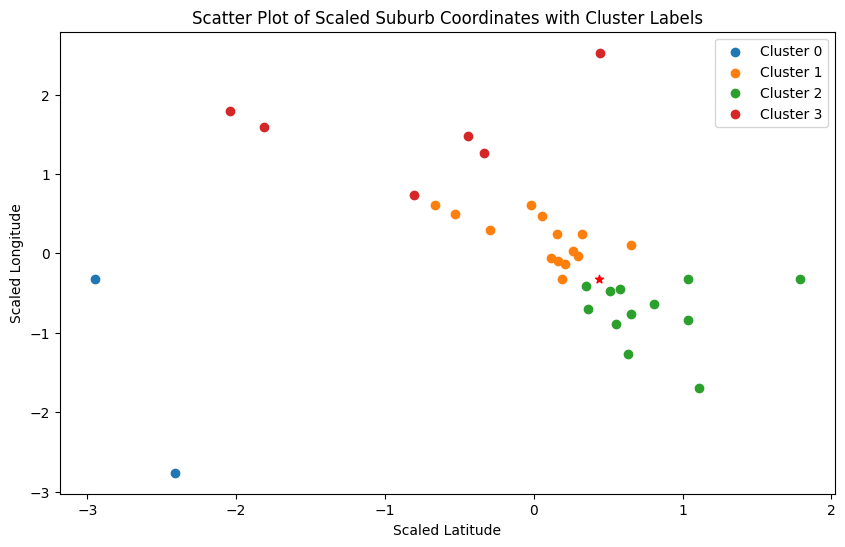

0.3884019753443678


In [65]:
# let's proceed with 4 clusters
# re-run KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=100)
kmeans.fit(suburb_coords_scaled)

# get the cluster labels
cluster_labels = kmeans.labels_

# plot the scaled suburb coordinates with cluster labels
plt.figure(figsize=(10, 6))
for i in range(4):
	plt.scatter(suburb_coords_scaled[cluster_labels == i, 0], suburb_coords_scaled[cluster_labels == i, 1], label=f'Cluster {i}')
# scaled coordinates of melbourne GPO
melbourne_coords_tup = (melbourne_coords.latitude, melbourne_coords.longitude)
melbourne_coords_scaled = scaler.transform([melbourne_coords_tup])
plt.scatter(melbourne_coords_scaled[:, 0], melbourne_coords_scaled[:, 1], color='red', marker='*')
plt.xlabel('Scaled Latitude')
plt.ylabel('Scaled Longitude')
plt.title('Scatter Plot of Scaled Suburb Coordinates with Cluster Labels')
plt.legend()
plt.show()

# compute silhouette score for the KMeans clustering
from sklearn.metrics import silhouette_score

silhouette_score(suburb_coords_scaled, kmeans.labels_)

print(silhouette_score(suburb_coords_scaled, kmeans.labels_))


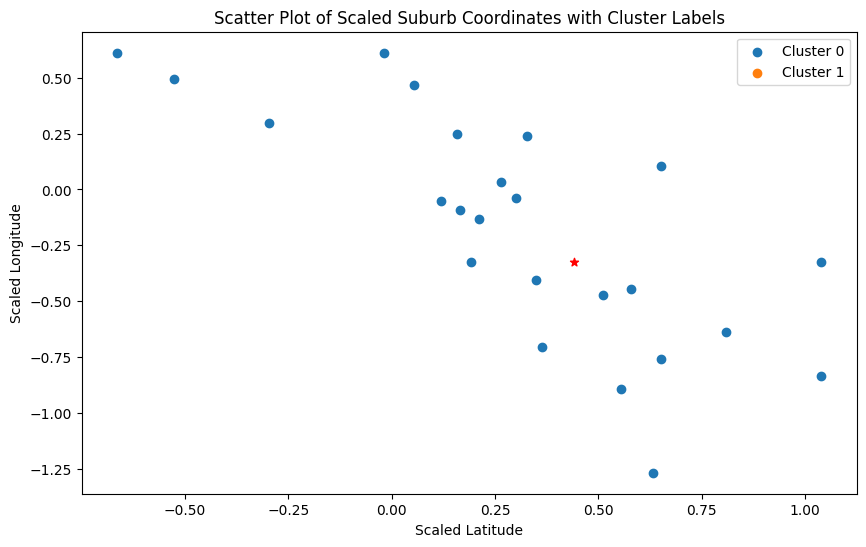

In [66]:
# run a DBSCAN clustering on the scaled suburb coordinates
from sklearn.cluster import DBSCAN

# initialize the DBSCAN model
dbscan = DBSCAN()

# fit the DBSCAN model with the scaled suburb coordinates
dbscan.fit(suburb_coords_scaled)

# get the cluster labels
cluster_labels = dbscan.labels_

# plot the scaled suburb coordinates with cluster labels
plt.figure(figsize=(10, 6))
for i in range(len(set(cluster_labels))):
	plt.scatter(suburb_coords_scaled[cluster_labels == i, 0], suburb_coords_scaled[cluster_labels == i, 1], label=f'Cluster {i}')
# scaled coordinates of melbourne GPO
melbourne_coords_tup = (melbourne_coords.latitude, melbourne_coords.longitude)
melbourne_coords_scaled = scaler.transform([melbourne_coords_tup])
plt.scatter(melbourne_coords_scaled[:, 0], melbourne_coords_scaled[:, 1], color='red', marker='*')
plt.xlabel('Scaled Latitude')
plt.ylabel('Scaled Longitude')
plt.title('Scatter Plot of Scaled Suburb Coordinates with Cluster Labels')
plt.legend()
plt.show()


In [67]:
# convert the (lat, lon) pairs to ECEF coordinates
from pyproj import Proj, transform

# define the WGS84 and ECEF coordinate systems
wgs84 = Proj(proj='latlong', datum='WGS84')
ecef = Proj(proj='geocent', datum='WGS84')

# convert the (lat, lon) pairs to ECEF coordinates
ecef_coords = [transform(wgs84, ecef, lon, lat, 0) for lat, lon in suburb_coords]
ecef_coords[:5]

C:\Users\subha\AppData\Local\Temp\ipykernel_13684\1792215116.py:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  ecef_coords = [transform(wgs84, ecef, lon, lat, 0) for lat, lon in suburb_coords]


[(-4130586.478775932, 2901397.944654177, -3885745.37536526),
 (-4127506.209235153, 2905340.0875953757, -3886070.7967349687),
 (-4144410.8496019444, 2905909.4538863874, -3867733.4415633464),
 (-4146929.337135501, 2873478.387122715, -3889061.2108218707),
 (-4136910.7974474016, 2900650.691362247, -3879611.7634175634)]

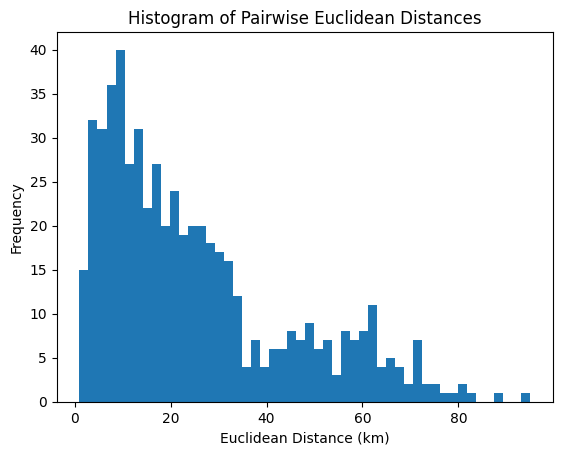

In [68]:
# compute the Euclidean distance matrix between the ECEF coordinates
from scipy.spatial.distance import pdist, squareform

# compute the pairwise Euclidean distances between the ECEF coordinates
ecef_dist = pdist(ecef_coords)/1000

# convert the pairwise distances to a square matrix
ecef_dist_matrix = squareform(ecef_dist)

# plot the histogram of the pairwise Euclidean distances
plt.hist(ecef_dist, bins=50)
plt.xlabel('Euclidean Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Pairwise Euclidean Distances')
plt.show()


Moran's I: 0.04952696893575969
p-value: 0.01


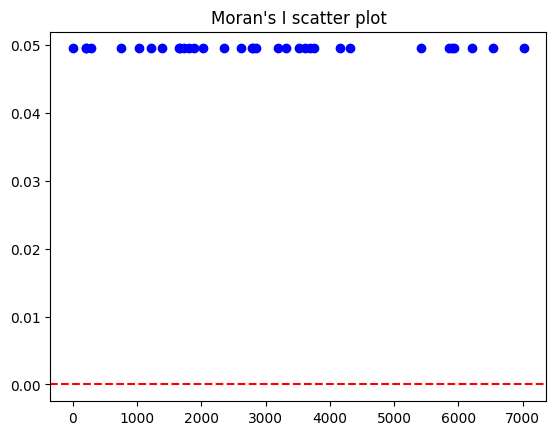

In [69]:
import numpy as np
import libpysal as lps
import esda
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset: values at different locations (e.g., housing prices, disease rates)
data = np.asarray(population_density[:,0].astype(float))

# Create spatial weights - this example uses a contiguity-based spatial weight matrix
# We'll create a simple 3x3 grid to represent locations
coords = np.asarray(ecef_coords)/1000

# Create a distance-based spatial weight matrix using libpysal's distance function
weights = lps.weights.DistanceBand(coords, threshold=50)

# Normalize the weights matrix
weights.transform = 'r'

# Calculate Moran's I
mi = esda.moran.Moran(data, weights)

# Output Moran's I and the p-value
print(f"Moran's I: {mi.I}")
print(f"p-value: {mi.p_sim}")

# Visualize Moran’s I values (optional)
plt.scatter(data, [mi.I] * len(data), c='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Moran's I scatter plot")
plt.show()


c:\Users\subha\miniconda3\Lib\site-packages\libpysal\weights\util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 4 islands with ids: 2, 3, 22, 26.
  w = W(neighbors, weights, ids, **kwargs)
c:\Users\subha\miniconda3\Lib\site-packages\libpysal\weights\distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 4 islands with ids: 2, 3, 22, 26.
  W.__init__(


('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')


c:\Users\subha\miniconda3\Lib\site-packages\esda\moran.py:1084: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
C:\Users\subha\AppData\Local\Temp\ipykernel_13684\2596921722.py:30: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  gdf = gpd.GeoDataFrame({'data': data, 'lisa': lisa.q, 'geometry': [lps.cg.Point(c) for c in coords]})


Local Moran's I values: [ 0.0581991  -0.00250354 -0.         -0.         -0.00526338 -0.02477509
  0.10885324 -0.09552822  0.3129397   0.48256643  0.04995201 -0.26809762
  0.24645814  0.22857793 -0.11082179  0.7717281   0.34002569 -0.44240837
  0.00741619 -0.51730787  1.24857132  1.57187802 -0.          0.49607498
  0.93902785  0.11039107 -0.          0.90945356  0.97641285  1.02565977
  0.08338119  1.57187802  0.27832899  1.38100865]
p-values: [0.273 0.479 0.001 0.001 0.464 0.099 0.145 0.001 0.001 0.375 0.103 0.182
 0.154 0.006 0.262 0.001 0.003 0.001 0.44  0.001 0.001 0.066 0.001 0.001
 0.001 0.345 0.001 0.001 0.001 0.001 0.001 0.126 0.339 0.001]
Clusters/Outliers classification: [3 3 2 1 1 1 1 2 2 1 3 1 1 3 1 1 1 1 1]


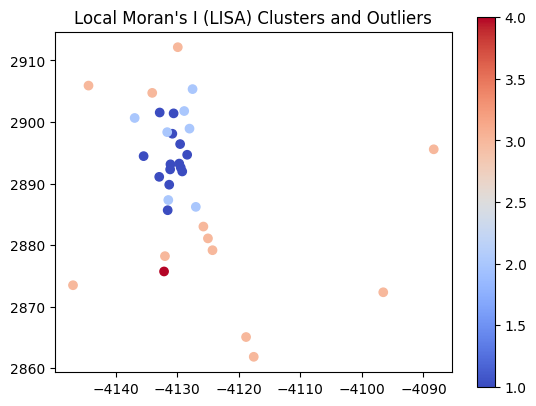

In [70]:
import numpy as np
import libpysal as lps
import esda
import geopandas as gpd
import matplotlib.pyplot as plt

# Example data: values (e.g., crime rates or housing prices) for different spatial units
data = np.array(population_density[:,0].astype(float))

# Coordinates representing the locations of the spatial units
coords = np.asarray(ecef_coords)/1000

# Create spatial weights based on distance
weights = lps.weights.DistanceBand(coords, threshold=10)
weights.transform = 'r'

# Calculate Local Moran's I
lisa = esda.Moran_Local(data, weights)

# Output the Local Moran's I statistic for each point
print("Local Moran's I values:", lisa.Is)
print("p-values:", lisa.p_sim)

# Identify clusters and outliers
# Local clusters where p-value < 0.05 (typically interpreted as significant)
significant_clusters = lisa.q[lisa.p_sim < 0.05]
print("Clusters/Outliers classification:", significant_clusters)

# Visualize the LISA result
gdf = gpd.GeoDataFrame({'data': data, 'lisa': lisa.q, 'geometry': [lps.cg.Point(c) for c in coords]})
gdf.plot(column='lisa', cmap='coolwarm', legend=True)
plt.title("Local Moran's I (LISA) Clusters and Outliers")
plt.show()


In [71]:
min_threshold = lps.weights.min_threshold_distance(suburb_coords)
print("Minimum threshold distance:", min_threshold)


Minimum threshold distance: 0.2881222401131092


In [72]:
from scipy import stats

#compute euclidean distance between all pairs of points using geopy
from geopy.distance import geodesic

#initialize a distance matrix
distance_matrix = np.zeros((len(suburb_coords), len(suburb_coords)))

#compute the distance between each pair of points
for i, (lat1, lon1) in enumerate(suburb_coords):
	for j, (lat2, lon2) in enumerate(suburb_coords):
		distance_matrix[i, j] = geodesic((lat1, lon1), (lat2, lon2)).kilometers


In [73]:
stats.describe(distance_matrix.flatten())

DescribeResult(nobs=1156, minmax=(np.float64(0.0), np.float64(95.0)), mean=np.float64(24.560766412999726), variance=np.float64(394.03846862682406), skewness=np.float64(1.0264085233271707), kurtosis=np.float64(0.24805930318367952))

In [74]:
# convert the (lat, lon) pairs to ECEF coordinates
from pyproj import Proj, transform

# define the WGS84 and ECEF coordinate systems
wgs84 = Proj(proj='latlong', datum='WGS84')
ecef = Proj(proj='geocent', datum='WGS84')

# convert the (lat, lon) pairs to ECEF coordinates
ecef_coords = [transform(wgs84, ecef, lon, lat, 0) for lat, lon in suburb_coords]
ecef_coords[:5]


C:\Users\subha\AppData\Local\Temp\ipykernel_13684\426052249.py:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  ecef_coords = [transform(wgs84, ecef, lon, lat, 0) for lat, lon in suburb_coords]


[(-4130586.478775932, 2901397.944654177, -3885745.37536526),
 (-4127506.209235153, 2905340.0875953757, -3886070.7967349687),
 (-4144410.8496019444, 2905909.4538863874, -3867733.4415633464),
 (-4146929.337135501, 2873478.387122715, -3889061.2108218707),
 (-4136910.7974474016, 2900650.691362247, -3879611.7634175634)]

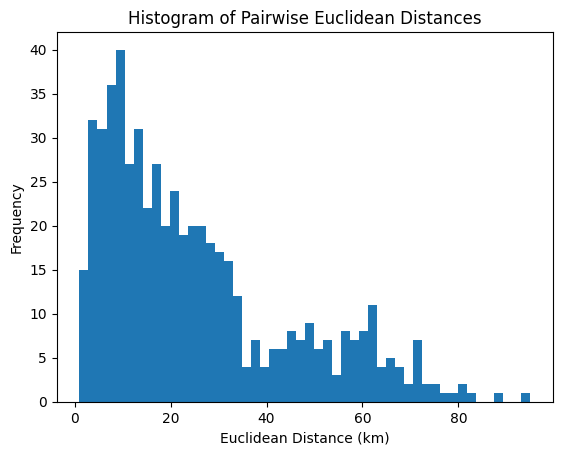

In [75]:
# compute the Euclidean distance matrix between the ECEF coordinates
from scipy.spatial.distance import pdist, squareform

# compute the pairwise Euclidean distances between the ECEF coordinates
ecef_dist = pdist(ecef_coords)/1000

# convert the pairwise distances to a square matrix
ecef_dist_matrix = squareform(ecef_dist)

# plot the histogram of the pairwise Euclidean distances
plt.hist(ecef_dist, bins=50)
plt.xlabel('Euclidean Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Pairwise Euclidean Distances')
plt.show()


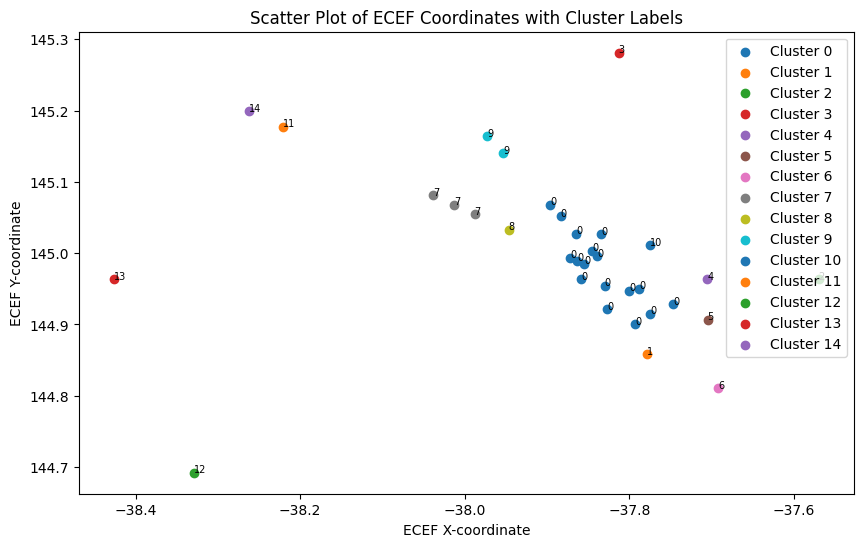

In [76]:
# run DBSCAN clustering on the ECEF coordinates
from sklearn.cluster import DBSCAN

# initialize the DBSCAN model
dbscan = DBSCAN(eps=0.04, min_samples=1)


# fit the DBSCAN model with the ECEF coordinates
dbscan.fit(suburb_coords)

# get the cluster labels
cluster_labels = dbscan.labels_

# plot the ECEF coordinates with cluster labels
plt.figure(figsize=(10, 6))
for i in range(len(set(cluster_labels))):
	plt.scatter(np.array(suburb_coords)[cluster_labels == i, 0], np.array(suburb_coords)[cluster_labels == i, 1], label=f'Cluster {i}')
	# also annotate the points with the cluster labels
	for j, txt in enumerate(suburb_dict.values()):
		if cluster_labels[j] == i:
			plt.annotate(i, (suburb_coords[j][0], suburb_coords[j][1]), fontsize=7)
plt.xlabel('ECEF X-coordinate')
plt.ylabel('ECEF Y-coordinate')
plt.title('Scatter Plot of ECEF Coordinates with Cluster Labels')
plt.legend()
plt.show()


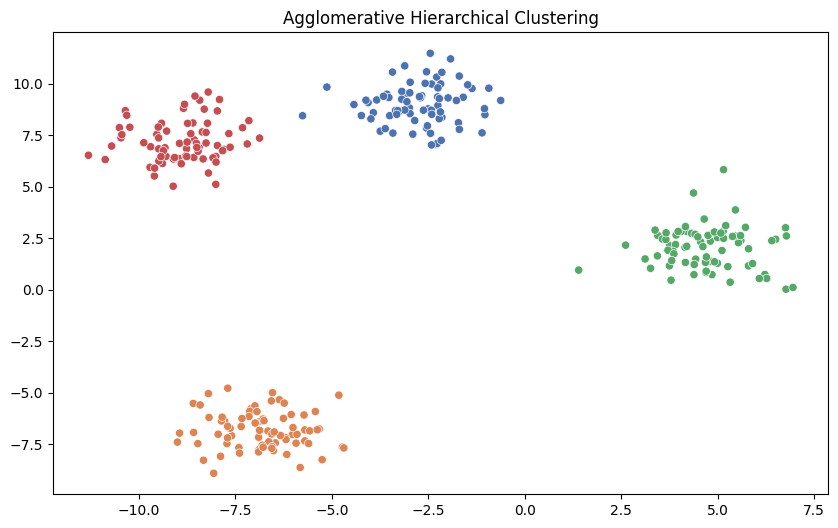

In [77]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Initialize Agglomerative Clustering
# n_clusters is the number of clusters you want to find, linkage defines the distance metric
# 'ward' minimizes the variance within clusters, 'complete' and 'average' use other metrics.
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Fit the model and predict the clusters
y_hc = hc.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_hc, palette='deep', legend=None)
plt.title("Agglomerative Hierarchical Clustering")
plt.show()


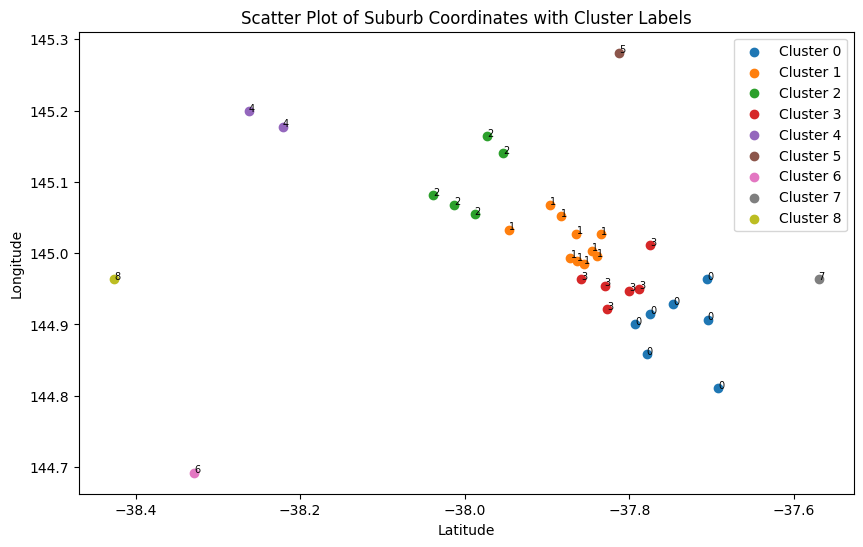

In [78]:
num_clusters = 9
# do aggregation clustering on the suburb coordinates
# initialize the AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward',metric='euclidean')

# fit the AgglomerativeClustering model with the suburb coordinates
agg_clustering.fit(suburb_coords)

# get the cluster labels
cluster_labels = agg_clustering.labels_

# plot the suburb coordinates with cluster labels
plt.figure(figsize=(10, 6))

for i in range(num_clusters):
	plt.scatter(np.array(suburb_coords)[cluster_labels == i, 0], np.array(suburb_coords)[cluster_labels == i, 1], label=f'Cluster {i}')
	# also annotate the points with the cluster labels
	for j, txt in enumerate(suburb_dict.values()):
		if cluster_labels[j] == i:
			plt.annotate(i, (suburb_coords[j][0], suburb_coords[j][1]), fontsize=7)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Suburb Coordinates with Cluster Labels')
plt.legend()
plt.show()


In [79]:
# compute davies bouldin score
from sklearn.metrics import davies_bouldin_score

# compute the Davies-Bouldin score
davies_bouldin = davies_bouldin_score(suburb_coords, cluster_labels)
davies_bouldin


np.float64(0.4903617779305032)

In [80]:
# compute cophenetic correlation coefficient for the agglomerative clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# compute the linkage matrix
Z = linkage(suburb_coords, 'ward', metric='euclidean')

# compute the cophenetic correlation coefficient
c, coph_dists = cophenet(Z, pdist(suburb_coords))
c

np.float64(0.6974430857976548)

In [81]:
# compute the silhouette score for the agglomerative clustering
from sklearn.metrics import silhouette_score

# compute the silhouette score
silhouette = silhouette_score(suburb_coords, cluster_labels)
silhouette


np.float64(0.3147928209140942)

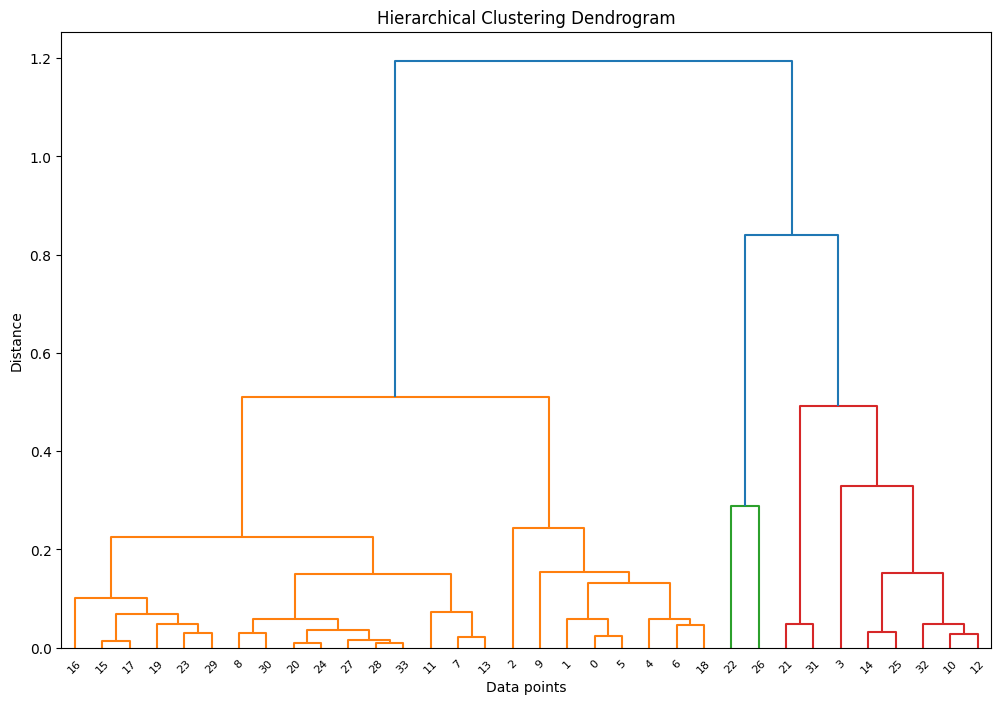

In [82]:
# # Import necessary libraries
# from scipy.cluster.hierarchy import dendrogram, linkage
# import matplotlib.pyplot as plt

# # Generate sample data
# X, y = make_blobs(n_samples=100, centers=4, random_state=42, cluster_std=1.0)

# # Generate the linkage matrix using hierarchical clustering
# # 'ward' minimizes the variance of clusters
Z = linkage(suburb_coords, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()


In [84]:
# # Import necessary functions
# from scipy.cluster.hierarchy import fcluster

# # Set a threshold distance at which to cut the dendrogram (e.g., max_dist)
# max_dist = 7  # Cut-off distance

# # Form clusters by cutting the dendrogram at the specified max_dist
# clusters = fcluster(Z, max_dist, criterion='distance')

# # Plot the clusters formed by cutting the dendrogram
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='deep', legend=None)
# plt.title("Clusters formed by cutting the Dendrogram")
# plt.show()


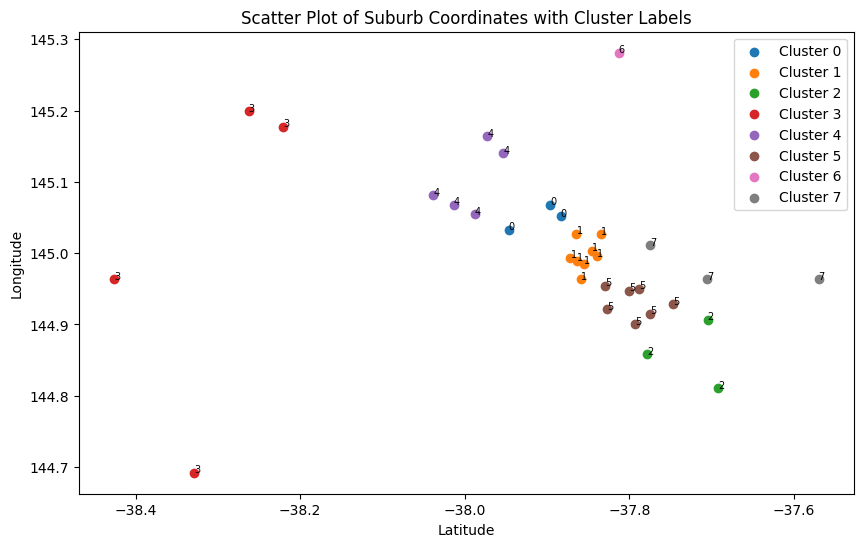

In [88]:
# do spectral clustering on the suburb coordinates
from sklearn.cluster import SpectralClustering

# initialize the SpectralClustering model
spectral_clustering = SpectralClustering(n_clusters=8, affinity='nearest_neighbors', n_neighbors=10)

# fit the SpectralClustering model with the suburb coordinates
cluster_labels = spectral_clustering.fit_predict(suburb_coords)

# plot the suburb coordinates with cluster labels
plt.figure(figsize=(10, 6))
for i in range(8):
	plt.scatter(np.array(suburb_coords)[cluster_labels == i, 0], np.array(suburb_coords)[cluster_labels == i, 1], label=f'Cluster {i}')
	# also annotate the points with the cluster labels
	for j, txt in enumerate(suburb_dict.values()):
		if cluster_labels[j] == i:
			plt.annotate(i, (suburb_coords[j][0], suburb_coords[j][1]), fontsize=7)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Suburb Coordinates with Cluster Labels')
plt.legend()
plt.show()